In [1]:
import pandas as pd

df_train = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID_train.csv')

# Load your pre-split testing dataset into a pandas DataFrame
# Replace 'test_dataset.csv' with the actual name of your testing dataset
df_test = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID_test.csv')

df_train = df_train.drop('pt', axis=1)
df_test = df_test.drop('pt', axis=1)

# Separate features (X) and target variable (y) for training dataset
X_train = df_train.drop('Neuropsychiatric symptoms-new', axis=1)
y_train = df_train['Neuropsychiatric symptoms-new']

# Separate features (X) and target variable (y) for testing dataset
X_test = df_test.drop('Neuropsychiatric symptoms-new', axis=1)
y_test = df_test['Neuropsychiatric symptoms-new']

column_names = ['deepSleepTime (hours)', 'sleep_duration (hours)', 'REMTime (hours)','shallowSleepTime (hours)', 'Oxygen level (SpO2)']

In [4]:
X_train1.columns

Index(['deepSleepTime (hours)', 'sleep_duration (hours)', 'REMTime (hours)',
       'shallowSleepTime (hours)', 'Oxygen level (SpO2)'],
      dtype='object')

In [2]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=33)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=column_names), pd.Series(y_resampled, name='Neuropsychiatric symptoms-new')], axis=1)

# Display the count of each class after oversampling
print("Class distribution after oversampling:")
print(df_resampled['Neuropsychiatric symptoms-new'].value_counts())

# Save the oversampled dataset to a new CSV file
df_resampled.to_csv('oversampled_normalized_ML_COVID_train_byparticipants.csv', index=False)

Class distribution after oversampling:
0    424
1    424
Name: Neuropsychiatric symptoms-new, dtype: int64


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=30)
xgb_classifier = XGBClassifier(random_state=30)
logreg_classifier = LogisticRegression(random_state=30)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest',
         'XGBoost',
         'Logistic Regression',
         'Voting Classifier']

model_accuracy_test_set = []
model_accuracy_cross_val = []

for model, name in zip(models, names):
    # Evaluate on the test set
    model.fit(X_train, y_train)
    y_pred_test_set = model.predict(X_test)
    test_set_score = accuracy_score(y_test, y_pred_test_set)
    model_accuracy_test_set.append(test_set_score)

    # Evaluate using cross-validation on the training set
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)
    cross_val_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cross_val_score_mean = cross_val_results.mean()
    model_accuracy_cross_val.append(cross_val_score_mean)

evaluation = pd.DataFrame({
    'Models': names,
    'Model Accuracy (Test Set)': model_accuracy_test_set,
    'Cross-Validation Accuracy': model_accuracy_cross_val
})

evaluation.sort_values(by="Model Accuracy (Test Set)", ascending=False)

,Models,Model Accuracy (Test Set),Cross-Validation Accuracy
3,Voting Classifier,0.872,0.859232
2,Logistic Regression,0.856,0.853131
0,Random Forest,0.848,0.861273
1,XGBoost,0.848,0.861192


In [5]:
firstmodel = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')
firstmodel.fit(X_train,y_train)
pred = firstmodel.predict(X_test)
print('Accuracy on test set: {:.4f}'.format(firstmodel.score(X_test, y_test)))

Accuracy on test set: 0.8720


In [8]:
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

LRmodel = LogisticRegression(random_state=30)
LRmodel.fit(X_train,y_train)
LRpred = LRmodel.predict(X_test)
print('Accuracy on test set: {:.4f}'.format(LRmodel.score(X_test, y_test)))
print(classification_report(y_test, LRpred))
print(confusion_matrix(y_test, LRpred))

Accuracy on test set: 0.8560
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       107
           1       0.00      0.00      0.00        18

    accuracy                           0.86       125
   macro avg       0.43      0.50      0.46       125
weighted avg       0.73      0.86      0.79       125

[[107   0]
 [ 18   0]]


Text(50.722222222222214, 0.5, 'True')

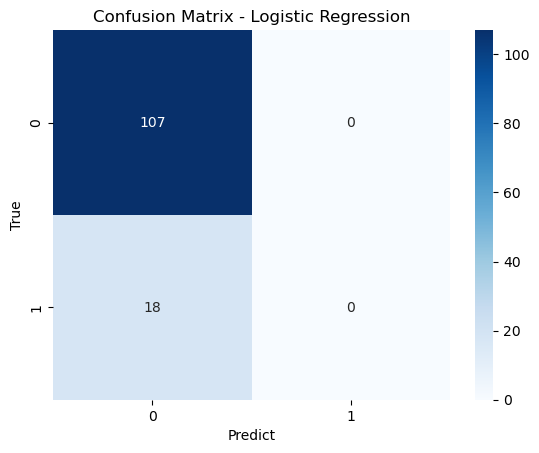

In [9]:
import seaborn as sn

#dataframe
CM_LR = confusion_matrix(y_test,LRpred)
df_LR = pd.DataFrame(CM_LR)
df_LR
ax = sn.heatmap(df_LR,annot=True,fmt='.20g',cmap='Blues')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.set_xlabel('Predict') #x
ax.set_ylabel('True') #y

In [32]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have X_train, y_train, X_test, y_test from your dataset

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=67)
xgb_classifier = XGBClassifier(random_state=67)
logreg_classifier = LogisticRegression(random_state=67)

# List of models
models = [
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
]

# Create a VotingClassifier
voting_classifier = VotingClassifier(estimators=models, voting='hard')

# Define hyperparameters for each individual classifier
param_grid = {
    'random_forest__n_estimators': [50, 100, 200],
    'xgboost__n_estimators': [50, 100, 200, 300],
    'logistic_regression__C': [0.1, 1, 10],
}

# Perform Grid Search on the hyperparameters
grid_search = GridSearchCV(estimator=voting_classifier, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the tuned model on the test set
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)


Best Hyperparameters: {'logistic_regression__C': 0.1, 'random_forest__n_estimators': 100, 'xgboost__n_estimators': 100}
Test Set Accuracy: 0.856


In [38]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for each classifier
params_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

params_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

params_logreg = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize the classifiers with default parameters
rf_classifier = RandomForestClassifier(random_state=66)
xgb_classifier = XGBClassifier(random_state=66)
logreg_classifier = LogisticRegression(random_state=66)

# GridSearchCV for each classifier
grid_rf = GridSearchCV(rf_classifier, params_rf, cv=5, scoring='accuracy')
grid_xgb = GridSearchCV(xgb_classifier, params_xgb, cv=5, scoring='accuracy')
grid_logreg = GridSearchCV(logreg_classifier, params_logreg, cv=5, scoring='accuracy')

# Fit the grid search models
grid_rf.fit(X_train, y_train)
grid_xgb.fit(X_train, y_train)
grid_logreg.fit(X_train, y_train)

# Get the best hyperparameters for each classifier
best_params_rf = grid_rf.best_params_
best_params_xgb = grid_xgb.best_params_
best_params_logreg = grid_logreg.best_params_

# Use the best estimators obtained from grid search
best_rf = grid_rf.best_estimator_
best_xgb = grid_xgb.best_estimator_
best_logreg = grid_logreg.best_estimator_

# Create a VotingClassifier with the best estimators
best_voting_classifier = VotingClassifier(estimators=[
    ('random_forest', best_rf),
    ('xgboost', best_xgb),
    ('logistic_regression', best_logreg)
], voting='hard')

# Fit the VotingClassifier with the best estimators
best_voting_classifier.fit(X_train, y_train)

# Evaluate the best VotingClassifier
best_voting_accuracy = best_voting_classifier.score(X_test, y_test)
print("Accuracy of the best VotingClassifier on the test set:", best_voting_accuracy)


Accuracy of the best VotingClassifier on the test set: 0.856


In [22]:
best_params_rf

{'max_depth': 5, 'n_estimators': 100}

In [23]:
best_params_xgb

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

In [24]:
best_params_logreg

{'C': 0.1, 'solver': 'liblinear'}

In [25]:
best_rf 

RandomForestClassifier(max_depth=5, random_state=66)

In [26]:
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=66, ...)

In [27]:
best_logreg 

LogisticRegression(C=0.1, random_state=66, solver='liblinear')

In [52]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Score evaluation of tuned GBC final model
finalVC = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')

finalVC.fit(X_train,y_train)
VCpred = finalVC.predict(X_test)

print('Accuracy on test set: {:.4f}'.format(finalVC.score(X_test, y_test)))
print(classification_report(y_test, VCpred))
print(confusion_matrix(y_test, VCpred))

Accuracy on test set: 0.8720
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       107
           1       0.67      0.22      0.33        18

    accuracy                           0.87       125
   macro avg       0.77      0.60      0.63       125
weighted avg       0.85      0.87      0.84       125

[[105   2]
 [ 14   4]]


Text(50.722222222222214, 0.5, 'True')

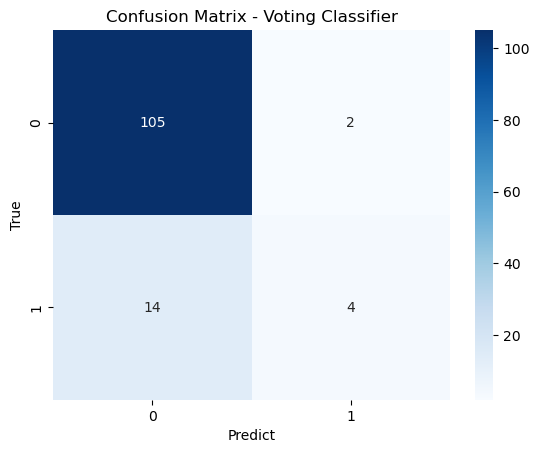

In [53]:
import seaborn as sn

#dataframe
CM_VC = confusion_matrix(y_test,VCpred)
df_VC = pd.DataFrame(CM_VC)
df_VC
ax = sn.heatmap(df_VC,annot=True,fmt='.20g',cmap='Blues')
ax.set_title('Confusion Matrix - Voting Classifier')
ax.set_xlabel('Predict') #x
ax.set_ylabel('True') #y

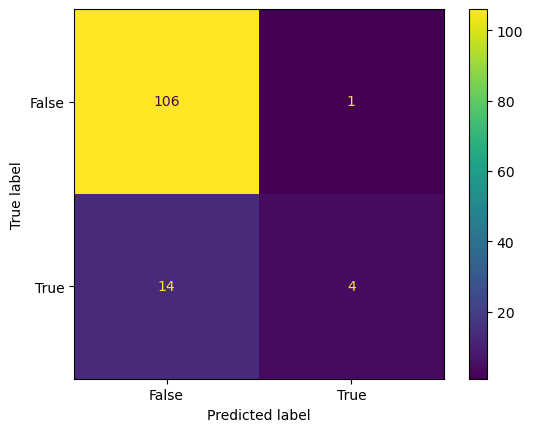

In [42]:
from sklearn import metrics
import matplotlib.pyplot as plt

#Analysis of actual values vs predicted values based on tuned VC model
confusion_matrix = metrics.confusion_matrix(y_test, VCpred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

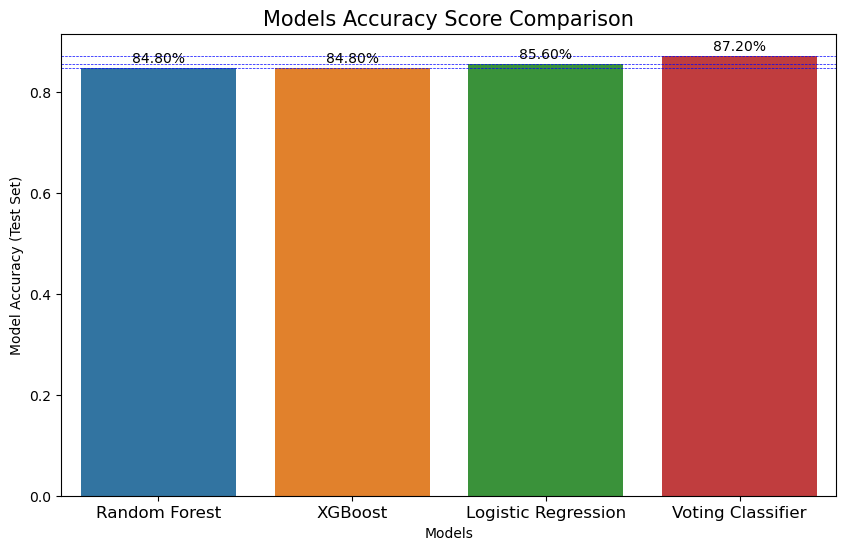

In [87]:
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# # Your data and plotting code
# plt.figure(figsize=(10, 6))

# # Create the bar plot
# sns.barplot(x=evaluation["Models"], y=evaluation["Model Accuracy (Test Set)"])

# # Adding values on top of each bar
# for index, value in enumerate(evaluation["Model Accuracy (Test Set)"]):
#     plt.text(index, value + 0.01, f'{value:.3f}', ha='center', fontsize=10)

# # Adding lines to the y-axis
# for index, value in enumerate(evaluation["Model Accuracy (Test Set)"]):
#     plt.plot([index, index], [0, value], color='black', linestyle='-', linewidth=0.5)

# plt.title("Models Accuracy Score Comparison", size=15)
# plt.xticks(rotation=0, size=12)
# plt.show()

# #visualization of model scores
# plt.figure(figsize = (10, 6))
# sns.barplot(x = evaluation["Models"], y = evaluation["Model Accuracy (Test Set)"])
# plt.title("Models Accuracy Score Comparison", size = 15)
# plt.xticks(rotation = 0, size = 12)
# plt.show()

# Create a bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=evaluation["Models"], y=evaluation["Model Accuracy (Test Set)"])

# Add lines connecting each bar to the y-axis and display values on top as percentages
for index, value in enumerate(evaluation["Model Accuracy (Test Set)"]):
    plt.text(index, value + 0.01, f'{value:.2%}', ha='center')  # Display value on top of each bar in percentage
    plt.axhline(y=value, xmax=index, color='blue', linestyle='--', linewidth=0.5)  # Vertical dashed line to y-axis
#     plt.hlines(y=value, xmin=-0.4, xmax=index, colors='blue', linestyle='--', linewidth=0.5)  # Line connecting bar to y-axis

plt.title("Models Accuracy Score Comparison", size=15)
plt.xticks(rotation=0, size=12)
plt.show()

In [ ]:
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load your data from a CSV file
df = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID_train.csv')

# 'pt' is a column that identifies participants
participants = df['pt'].unique()

# Number of participants
# num_participants = len(data)

# Number of folds
num_folds = 6

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=30)
xgb_classifier = XGBClassifier(random_state=30)
logreg_classifier = LogisticRegression(random_state=30)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest',
         'XGBoost',
         'Logistic Regression',
         'Voting Classifier']

# Lists to store training and validation accuracies for each model
train_accuracies = {name: [] for name in names}
val_accuracies = {name: [] for name in names}

# Cross-validation loop
for train_indices, val_indices in skf.split(data):
    # Split data into training and validation sets
    train_data = [data[i] for i in train_indices]
    val_data = data[val_indices[0]]  # Take the first participant as the validation set

    # Split data into features and labels (replace with your actual data preprocessing)
    X_train, y_train = preprocess_data(train_data)
    X_val, y_val = preprocess_data(val_data)

    # Train and evaluate each model
    for model, name in zip(models, names):
        # Train your model
        model.fit(X_train, y_train)

        # Make predictions on training and validation sets
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_val)

        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, train_preds)
        val_accuracy = accuracy_score(y_val, val_preds)

        # Store accuracies
        train_accuracies[name].append(train_accuracy)
        val_accuracies[name].append(val_accuracy)

# Print or analyze the results for each model
for name in names:
    print(f"{name} - Training Accuracies: {train_accuracies[name]}")
    print(f"{name} - Validation Accuracies: {val_accuracies[name]}")
    print()

In [ ]:
import pandas as pd

# Load your data from a CSV file
df_train = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID_train.csv')

column_names = ['deepSleepTime (hours)', 'sleep_duration (hours)', 'REMTime (hours)','shallowSleepTime (hours)', 'Oxygen level (SpO2)']

# Separate features (X) and target variable (y) for training dataset
X_train = df_train.drop('Neuropsychiatric symptoms-new', axis=1)
y_train = df_train['Neuropsychiatric symptoms-new']

from sklearn.preprocessing import MinMaxScaler

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

import pandas as pd
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=40)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=column_names), pd.Series(y_resampled, name='Neuropsychiatric symptoms-new')], axis=1)

# Display the count of each class after oversampling
print("Class distribution after oversampling:")
print(df_resampled['Neuropsychiatric symptoms-new'].value_counts())

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# 'pt' is a column that identifies participants, 'target' is the target variable
participants = df['pt'].unique()
targets = df.groupby('pt')['target'].max()  # Assuming 'target' is the column containing class labels

# Number of folds
num_folds = 6

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=34)
xgb_classifier = XGBClassifier(random_state=34)
logreg_classifier = LogisticRegression(random_state=34)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest',
         'XGBoost',
         'Logistic Regression',
         'Voting Classifier']

# Lists to store training and validation accuracies for each model
train_accuracies = {name: [] for name in names}
val_accuracies = {name: [] for name in names}

# Cross-validation loop with Stratified K-Fold
for train_indices, val_indices in skf.split(participants, targets):
    
    # Split data into training and validation sets
    train_participants = participants[train_indices]
    val_participants = participants[val_indices]

    train_data = df[df['pt'].isin(train_participants)]
    val_data = df[df['pt'].isin(val_participants)]

    # Split data into features and labels (replace with your actual data preprocessing)
    X_train, y_train = preprocess_data(train_data)
    X_val, y_val = preprocess_data(val_data)

    # Train and evaluate each model
    for model, name in zip(models, names):
        # Train your model
        model.fit(X_train, y_train)

        # Make predictions on training and validation sets
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_val)

        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, train_preds)
        val_accuracy = accuracy_score(y_val, val_preds)

        # Store accuracies
        train_accuracies[name].append(train_accuracy)
        val_accuracies[name].append(val_accuracy)

# Print or analyze the results for each model
for name in names:
    print(f"{name} - Training Accuracies: {train_accuracies[name]}")
    print(f"{name} - Validation Accuracies: {val_accuracies[name]}")
    print()


In [2]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Load your data from a CSV file
df_train = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID_train.csv')

column_names = ['pt', 'deepSleepTime (hours)', 'sleep_duration (hours)', 'REMTime (hours)', 'shallowSleepTime (hours)', 'Oxygen level (SpO2)']

# Separate features (X) and target variable (y) for the training dataset
X_train = df_train.drop('Neuropsychiatric symptoms-new', axis=1)
y_train = df_train['Neuropsychiatric symptoms-new']

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=40)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=column_names), pd.Series(y_resampled, name='Neuropsychiatric symptoms-new')], axis=1)

# Display the count of each class after oversampling
print("Class distribution after oversampling:")
print(df_resampled['Neuropsychiatric symptoms-new'].value_counts())

# Number of folds
num_folds = 6

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=34)
xgb_classifier = XGBClassifier(random_state=34)
logreg_classifier = LogisticRegression(random_state=34)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Lists to store training and validation accuracies for each model
train_accuracies = {name: [] for name in names}
val_accuracies = {name: [] for name in names}

# Cross-validation loop with Stratified K-Fold
for train_indices, val_indices in skf.split(df_resampled.drop('Neuropsychiatric symptoms-new', axis=1), df_resampled['Neuropsychiatric symptoms-new']):
    
    # Split data into training and validation sets
    X_train = df_resampled.iloc[train_indices].drop('Neuropsychiatric symptoms-new', axis=1)
    y_train = df_resampled.iloc[train_indices]['Neuropsychiatric symptoms-new']
    
    X_val = df_resampled.iloc[val_indices].drop('Neuropsychiatric symptoms-new', axis=1)
    y_val = df_resampled.iloc[val_indices]['Neuropsychiatric symptoms-new']

    # Train and evaluate each model
    for model, name in zip(models, names):
        # Train your model
        model.fit(X_train, y_train)

        # Make predictions on training and validation sets
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_val)

        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, train_preds)
        val_accuracy = accuracy_score(y_val, val_preds)

        # Store accuracies
        train_accuracies[name].append(train_accuracy)
        val_accuracies[name].append(val_accuracy)

# Print or analyze the results for each model
for name in names:
    print(f"{name} - Training Accuracies: {train_accuracies[name]}")
    print(f"{name} - Validation Accuracies: {val_accuracies[name]}")
    print()


Class distribution after oversampling:
0    424
1    424
Name: Neuropsychiatric symptoms-new, dtype: int64
Random Forest - Training Accuracies: [0.9971671388101983, 0.9971671388101983, 0.9985855728429985, 0.9971711456859972, 1.0, 0.9971711456859972]
Random Forest - Validation Accuracies: [0.9577464788732394, 0.9577464788732394, 0.9858156028368794, 0.9787234042553191, 0.900709219858156, 0.9645390070921985]

XGBoost - Training Accuracies: [0.9971671388101983, 0.9971671388101983, 0.9985855728429985, 0.9971711456859972, 1.0, 0.9971711456859972]
XGBoost - Validation Accuracies: [0.971830985915493, 0.9577464788732394, 0.9787234042553191, 0.9645390070921985, 0.950354609929078, 0.9574468085106383]

Logistic Regression - Training Accuracies: [0.5509915014164306, 0.5424929178470255, 0.5148514851485149, 0.5332390381895332, 0.5332390381895332, 0.5685997171145686]
Logistic Regression - Validation Accuracies: [0.528169014084507, 0.5704225352112676, 0.5460992907801419, 0.4397163120567376, 0.517730496

In [3]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Load your data from a CSV file
df_train = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID_train.csv')

df_train = df_train.drop('pt', axis=1)

column_names = ['deepSleepTime (hours)', 'sleep_duration (hours)', 'REMTime (hours)', 'shallowSleepTime (hours)', 'Oxygen level (SpO2)']

# Separate features (X) and target variable (y) for the training dataset
X_train = df_train.drop('Neuropsychiatric symptoms-new', axis=1)
y_train = df_train['Neuropsychiatric symptoms-new']

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=40)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=column_names), pd.Series(y_resampled, name='Neuropsychiatric symptoms-new')], axis=1)

# Display the count of each class after oversampling
print("Class distribution after oversampling:")
print(df_resampled['Neuropsychiatric symptoms-new'].value_counts())

# Save the oversampled dataset to a new CSV file
df_resampled.to_csv('oversampled_normalized_ML_COVID_train_byparticipants_new.csv', index=False)

Class distribution after oversampling:
0    424
1    424
Name: Neuropsychiatric symptoms-new, dtype: int64


In [6]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_byparticipants_new.csv')

# Define participant groups for each fold
participant_groups = [
    [11, 15],  # Fold 1
    [16, 18],  # Fold 2
    [19, 1],   # Fold 3
    [2, 5],    # Fold 4
    [8, 9],    # Fold 5
    [3, 17]    # Fold 6 (Validation)
]

# Number of folds
num_folds = len(participant_groups)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=34)
xgb_classifier = XGBClassifier(random_state=34)
logreg_classifier = LogisticRegression(random_state=34)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Lists to store training and validation accuracies for each model
train_accuracies = {name: [] for name in names}
val_accuracies = {name: [] for name in names}

# Cross-validation loop with custom participant groups
for fold, (train_participants, val_participants) in enumerate(participant_groups):

    # Convert single integer values to lists
    train_participants = [train_participants] if isinstance(train_participants, int) else train_participants
    val_participants = [val_participants] if isinstance(val_participants, int) else val_participants

    # Split data into training and validation sets
    train_data = df_resampled[df_resampled['pt'].isin(train_participants)]
    val_data = df_resampled[df_resampled['pt'].isin(val_participants)]

    # Split data into features and labels for training set
    X_train = train_data.drop('Neuropsychiatric symptoms-new', axis=1)
    y_train = train_data['Neuropsychiatric symptoms-new']

    # Split data into features and labels for validation set
    X_val = val_data.drop('Neuropsychiatric symptoms-new', axis=1)
    y_val = val_data['Neuropsychiatric symptoms-new']

    # Train and evaluate each model
    for model, name in zip(models, names):
        model.fit(X_train, y_train)
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_val)

        train_accuracy = accuracy_score(y_train, train_preds)
        val_accuracy = accuracy_score(y_val, val_preds)

        train_accuracies[name].append(train_accuracy)
        val_accuracies[name].append(val_accuracy)

    print(f"Fold {fold + 1} - Participants for Training: {train_participants}")
    print(f"Fold {fold + 1} - Participants for Validation: {val_participants}")
    print()

# Print or analyze the results for each model
for name in names:
    print(f"{name} - Training Accuracies: {train_accuracies[name]}")
    print(f"{name} - Validation Accuracies: {val_accuracies[name]}")
    print()


Fold 1 - Participants for Training: [11]
Fold 1 - Participants for Validation: [15]

Fold 2 - Participants for Training: [16]
Fold 2 - Participants for Validation: [18]

Fold 3 - Participants for Training: [19]
Fold 3 - Participants for Validation: [1]

Fold 4 - Participants for Training: [2]
Fold 4 - Participants for Validation: [5]

Fold 5 - Participants for Training: [8]
Fold 5 - Participants for Validation: [9]

Fold 6 - Participants for Training: [3]
Fold 6 - Participants for Validation: [17]

Random Forest - Training Accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 0.9782608695652174]
Random Forest - Validation Accuracies: [0.45588235294117646, 0.4222222222222222, 0.6585365853658537, 0.5205479452054794, 0.37362637362637363, 0.48314606741573035]

XGBoost - Training Accuracies: [1.0, 0.9726027397260274, 0.9880952380952381, 1.0, 1.0, 0.9565217391304348]
XGBoost - Validation Accuracies: [0.4411764705882353, 0.3333333333333333, 0.5853658536585366, 0.5205479452054794, 0.3626373626373626, 0.528089

In [5]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_byparticipants_new.csv')

# Define participant groups for each fold
participant_groups = [
    [11, 15],  # Fold 1
    [16, 18],  # Fold 2
    [19, 1],   # Fold 3
    [2, 5],    # Fold 4
    [8, 9],    # Fold 5
    [3, 17]    # Fold 6 (Validation)
]

# Number of folds
num_folds = len(participant_groups)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=34)
xgb_classifier = XGBClassifier(random_state=34)
logreg_classifier = LogisticRegression(random_state=34)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Lists to store training and validation accuracies for each model
train_accuracies = {name: [] for name in names}
val_accuracies = {name: [] for name in names}

# Cross-validation loop with custom participant groups
for fold, (train_participants, val_participants) in enumerate(participant_groups):
    
    # Convert single integer values to lists
    train_participants = [train_participants] if isinstance(train_participants, int) else train_participants
    val_participants = [val_participants] if isinstance(val_participants, int) else val_participants

    # Split data into training and validation sets
    train_data = df_resampled[df_resampled['pt'].isin(train_participants)]
    val_data = df_resampled[df_resampled['pt'].isin(val_participants)]

    # Split data into features and labels for training set
    X_train = train_data.drop('Neuropsychiatric symptoms-new', axis=1)
    y_train = train_data['Neuropsychiatric symptoms-new']

    # Split data into features and labels for validation set
    X_val = val_data.drop('Neuropsychiatric symptoms-new', axis=1)
    y_val = val_data['Neuropsychiatric symptoms-new']

    # Train and evaluate each model
    for model, name in zip(models, names):
        model.fit(X_train, y_train)
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_val)

        train_accuracy = accuracy_score(y_train, train_preds)
        val_accuracy = accuracy_score(y_val, val_preds)

        train_accuracies[name].append(train_accuracy)
        val_accuracies[name].append(val_accuracy)

# Print or analyze the results for each model
for name in names:
    print(f"{name} - Average Training Accuracy: {sum(train_accuracies[name]) / num_folds}")
    print(f"{name} - Average Validation Accuracy: {sum(val_accuracies[name]) / num_folds}")
    print(f"{name} - Training Accuracies for each fold: {train_accuracies[name]}")
    print(f"{name} - Validation Accuracies for each fold: {val_accuracies[name]}")
    print()


Random Forest - Average Training Accuracy: 0.996376811594203
Random Forest - Average Validation Accuracy: 0.4856602577961393
Random Forest - Training Accuracies for each fold: [1.0, 1.0, 1.0, 1.0, 1.0, 0.9782608695652174]
Random Forest - Validation Accuracies for each fold: [0.45588235294117646, 0.4222222222222222, 0.6585365853658537, 0.5205479452054794, 0.37362637362637363, 0.48314606741573035]

XGBoost - Average Training Accuracy: 0.9862032861586166
XGBoost - Average Validation Accuracy: 0.4618584755105661
XGBoost - Training Accuracies for each fold: [1.0, 0.9726027397260274, 0.9880952380952381, 1.0, 1.0, 0.9565217391304348]
XGBoost - Validation Accuracies for each fold: [0.4411764705882353, 0.3333333333333333, 0.5853658536585366, 0.5205479452054794, 0.3626373626373626, 0.5280898876404494]

Logistic Regression - Average Training Accuracy: 0.6885986725588941
Logistic Regression - Average Validation Accuracy: 0.5135054829026265
Logistic Regression - Training Accuracies for each fold: [

In [9]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_byparticipants_new.csv')

# Define the target variable
target_variable = 'Neuropsychiatric symptoms-new'

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=60)
xgb_classifier = XGBClassifier(random_state=60)
logreg_classifier = LogisticRegression(random_state=60)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Lists to store training and validation accuracies for each model
train_accuracies = {name: [] for name in names}
val_accuracies = {name: [] for name in names}

# Stratified K-Fold cross-validation loop
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

for fold, (train_indices, val_indices) in enumerate(skf.split(df_resampled.drop(target_variable, axis=1), df_resampled[target_variable])):

    # Split data into training and validation sets
    train_data = df_resampled.iloc[train_indices]
    val_data = df_resampled.iloc[val_indices]

    # Split data into features and labels for training set
    X_train = train_data.drop(target_variable, axis=1)
    y_train = train_data[target_variable]

    # Split data into features and labels for validation set
    X_val = val_data.drop(target_variable, axis=1)
    y_val = val_data[target_variable]

    # Train and evaluate each model
    for model, name in zip(models, names):
        model.fit(X_train, y_train)
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_val)

        train_accuracy = accuracy_score(y_train, train_preds)
        val_accuracy = accuracy_score(y_val, val_preds)

        train_accuracies[name].append(train_accuracy)
        val_accuracies[name].append(val_accuracy)
        
    print(f"Fold {fold + 1} - Participants for Training: {train_indices}")
    print(f"Fold {fold + 1} - Participants for Validation: {val_indices}")
    print()

# Print or analyze the results for each model
for name in names:
    print(f"{name} - Average Training Accuracy: {sum(train_accuracies[name]) / num_folds}")
    print(f"{name} - Average Validation Accuracy: {sum(val_accuracies[name]) / num_folds}")
    print(f"{name} - Training Accuracies for each fold: {train_accuracies[name]}")
    print(f"{name} - Validation Accuracies for each fold: {val_accuracies[name]}")
    print()


Fold 1 - Participants for Training: [  0   1   3   4   5   6   7   8   9  10  12  14  15  16  17  18  20  21
  22  23  24  25  26  27  29  31  32  33  34  35  36  37  38  39  40  42
  43  44  45  46  48  49  50  51  52  53  55  56  57  58  59  61  62  64
  65  66  67  68  69  70  71  72  74  75  76  77  79  80  81  82  83  84
  87  88  89  90  92  96  98  99 100 101 102 103 104 105 108 109 110 111
 113 114 115 118 120 121 123 124 125 126 127 128 129 132 133 134 135 136
 137 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 173 174
 175 176 177 179 180 181 183 184 185 186 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 205 207 208 209 210 211 212 213 214 215
 216 220 221 222 223 224 225 226 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 255 257
 258 259 260 261 262 263 264 265 266 267 269 270 271 272 273 274 275 276
 277 278 279 28

Fold 4 - Participants for Training: [  0   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  21  23  24  26  28  29  30  31  33  34  35  36  37  38  39  41  42  43
  44  45  46  47  48  49  50  52  53  54  55  56  57  60  61  62  63  65
  68  69  70  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 104 105
 106 107 108 109 110 112 113 115 116 117 118 119 120 121 122 123 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 166 167 168 169 170 171 172 173 174 175 177 178 179 180 181 182 183 184
 185 186 187 189 190 191 193 194 197 198 199 201 202 203 204 205 206 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 223 224 225 226 227
 228 229 232 234 235 237 238 239 240 243 244 245 246 247 249 250 251 252
 253 254 255 256 257 258 259 261 262 263 264 265 266 268 269 270 271 272
 273 274 275 27

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for each classifier
params_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

params_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.3, 0.1, 0.01, 0.001]
}

params_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Initialize the classifiers with default parameters
rf_classifier = RandomForestClassifier(random_state=61)
xgb_classifier = XGBClassifier(random_state=61)
logreg_classifier = LogisticRegression(random_state=61)

# GridSearchCV for each classifier
grid_rf = GridSearchCV(rf_classifier, params_rf, cv=5, scoring='accuracy')
grid_xgb = GridSearchCV(xgb_classifier, params_xgb, cv=5, scoring='accuracy')
grid_logreg = GridSearchCV(logreg_classifier, params_logreg, cv=5, scoring='accuracy')

# Fit the grid search models
grid_rf.fit(X_train, y_train)
grid_xgb.fit(X_train, y_train)
grid_logreg.fit(X_train, y_train)

# Get the best hyperparameters for each classifier
best_params_rf = grid_rf.best_params_
best_params_xgb = grid_xgb.best_params_
best_params_logreg = grid_logreg.best_params_

# Use the best estimators obtained from grid search
best_rf = grid_rf.best_estimator_
best_xgb = grid_xgb.best_estimator_
best_logreg = grid_logreg.best_estimator_

# Create a VotingClassifier with the best estimators
best_voting_classifier = VotingClassifier(estimators=[
    ('random_forest', best_rf),
    ('xgboost', best_xgb),
    ('logistic_regression', best_logreg)
], voting='hard')

# Fit the VotingClassifier with the best estimators
best_voting_classifier.fit(X_train, y_train)

# Evaluate the best VotingClassifier
best_voting_accuracy = best_voting_classifier.score(X_val, y_val)
print("Accuracy of the best VotingClassifier on the test set:", best_voting_accuracy)

In [11]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Load your data from a CSV file
df_resampled = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_byparticipants_new.csv')

# Define the target variable
target_variable = 'Neuropsychiatric symptoms-new'

# Define the hyperparameters for each classifier
params_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

params_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.3, 0.1, 0.01, 0.001]
}

params_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=61)
xgb_classifier = XGBClassifier(random_state=61)
logreg_classifier = LogisticRegression(random_state=61)

# GridSearchCV for each classifier
grid_rf = GridSearchCV(rf_classifier, params_rf, cv=5, scoring='accuracy')
grid_xgb = GridSearchCV(xgb_classifier, params_xgb, cv=5, scoring='accuracy')
grid_logreg = GridSearchCV(logreg_classifier, params_logreg, cv=5, scoring='accuracy')

# List of models
models = [grid_rf, grid_xgb, grid_logreg]

names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Lists to store training and validation accuracies for each model
train_accuracies = {name: [] for name in names}
val_accuracies = {name: [] for name in names}

# Stratified K-Fold cross-validation loop
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

for fold, (train_indices, val_indices) in enumerate(skf.split(df_resampled.drop(target_variable, axis=1), df_resampled[target_variable])):
    
    # Split data into training and validation sets
    train_data = df_resampled.iloc[train_indices]
    val_data = df_resampled.iloc[val_indices]

    # Split data into features and labels for training set
    X_train = train_data.drop(target_variable, axis=1)
    y_train = train_data[target_variable]

    # Split data into features and labels for validation set
    X_val = val_data.drop(target_variable, axis=1)
    y_val = val_data[target_variable]

    # Fit the grid search models
    grid_rf.fit(X_train, y_train)
    grid_xgb.fit(X_train, y_train)
    grid_logreg.fit(X_train, y_train)

    # Use the best estimators obtained from grid search
    best_rf = grid_rf.best_estimator_
    best_xgb = grid_xgb.best_estimator_
    best_logreg = grid_logreg.best_estimator_

    # Create a VotingClassifier with the best estimators
    best_voting_classifier = VotingClassifier(estimators=[
        ('random_forest', best_rf),
        ('xgboost', best_xgb),
        ('logistic_regression', best_logreg)
    ], voting='hard')

    # Fit the VotingClassifier with the best estimators
    best_voting_classifier.fit(X_train, y_train)

    # Evaluate the best VotingClassifier
    train_preds = best_voting_classifier.predict(X_train)
    val_preds = best_voting_classifier.predict(X_val)

    train_accuracy = accuracy_score(y_train, train_preds)
    val_accuracy = accuracy_score(y_val, val_preds)

    train_accuracies['Voting Classifier'].append(train_accuracy)
    val_accuracies['Voting Classifier'].append(val_accuracy)

    print(f"Fold {fold + 1} - Participants for Training: {train_indices}")
    print(f"Fold {fold + 1} - Participants for Validation: {val_indices}")
    print()

# Print or analyze the results for the Voting Classifier
print("Voting Classifier - Average Training Accuracy:", sum(train_accuracies['Voting Classifier']) / len(train_accuracies['Voting Classifier']))
print("Voting Classifier - Average Validation Accuracy:", sum(val_accuracies['Voting Classifier']) / len(val_accuracies['Voting Classifier']))
print("Voting Classifier - Training Accuracies for each fold:", train_accuracies['Voting Classifier'])
print("Voting Classifier - Validation Accuracies for each fold:", val_accuracies['Voting Classifier'])


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='no

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep

Fold 1 - Participants for Training: [  0   1   3   4   5   6   7   8   9  10  12  14  15  16  17  18  20  21
  22  23  24  25  26  27  29  31  32  33  34  35  36  37  38  39  40  42
  43  44  45  46  48  49  50  51  52  53  55  56  57  58  59  61  62  64
  65  66  67  68  69  70  71  72  74  75  76  77  79  80  81  82  83  84
  87  88  89  90  92  96  98  99 100 101 102 103 104 105 108 109 110 111
 113 114 115 118 120 121 123 124 125 126 127 128 129 132 133 134 135 136
 137 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 173 174
 175 176 177 179 180 181 183 184 185 186 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 205 207 208 209 210 211 212 213 214 215
 216 220 221 222 223 224 225 226 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 255 257
 258 259 260 261 262 263 264 265 266 267 269 270 271 272 273 274 275 276
 277 278 279 28

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='no

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

Fold 2 - Participants for Training: [  0   1   2   3   4   5   6  11  13  15  17  18  19  20  21  22  23  24
  25  26  27  28  29  30  31  32  34  36  37  38  39  40  41  42  43  46
  47  49  50  51  52  53  54  55  56  58  59  60  63  64  65  66  67  71
  73  74  75  76  77  78  79  80  82  83  84  85  86  87  89  90  91  92
  93  94  95  97  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 124 125 127 128 129 130 131 132
 133 135 137 138 140 143 144 146 147 148 149 150 151 153 154 155 156 158
 159 161 163 164 165 166 167 168 169 170 171 172 174 175 176 177 178 180
 181 182 183 184 185 186 187 188 191 192 193 194 195 196 197 198 200 201
 202 203 204 206 207 208 210 212 213 214 216 217 218 219 220 222 223 225
 226 227 228 229 230 231 232 233 236 237 238 240 241 242 243 244 245 246
 247 248 249 250 251 252 254 255 256 257 258 259 260 262 263 264 265 266
 267 268 270 271 272 273 274 275 276 277 278 280 281 282 284 285 286 289
 290 291 293 29

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='no

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep

Fold 3 - Participants for Training: [  1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  22  25  26  27  28  29  30  31  32  33  34  35  38  40  41  43  44
  45  46  47  48  49  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  76  77  78  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 103 106 107 108 109 110 111 112 113 114 115 116 117 118 119 122 123 124
 125 126 127 128 129 130 131 133 134 135 136 137 138 139 140 141 142 143
 144 145 147 148 151 152 157 160 162 163 164 165 166 167 168 169 170 171
 172 173 174 176 177 178 179 180 182 183 184 187 188 189 190 191 192 194
 195 196 197 198 199 200 204 205 206 207 209 210 211 213 214 215 216 217
 218 219 221 222 224 227 228 229 230 231 232 233 234 235 236 238 239 240
 241 242 243 244 245 246 248 249 250 251 252 253 254 255 256 257 258 260
 261 264 265 266 267 268 269 270 272 273 274 275 276 277 278 279 281 282
 283 285 286 28

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='no

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep

Fold 4 - Participants for Training: [  0   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  21  23  24  26  28  29  30  31  33  34  35  36  37  38  39  41  42  43
  44  45  46  47  48  49  50  52  53  54  55  56  57  60  61  62  63  65
  68  69  70  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 104 105
 106 107 108 109 110 112 113 115 116 117 118 119 120 121 122 123 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 166 167 168 169 170 171 172 173 174 175 177 178 179 180 181 182 183 184
 185 186 187 189 190 191 193 194 197 198 199 201 202 203 204 205 206 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 223 224 225 226 227
 228 229 232 234 235 237 238 239 240 243 244 245 246 247 249 250 251 252
 253 254 255 256 257 258 259 261 262 263 264 265 266 268 269 270 271 272
 273 274 275 27

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='no

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Valu

Fold 5 - Participants for Training: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  22  23  24  25  27  28  29  30  32  33  35  36  37  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  57  58  59
  60  61  62  63  64  66  67  68  69  70  71  72  73  74  75  76  78  79
  80  81  84  85  86  88  89  90  91  92  93  94  95  96  97  98 100 102
 103 104 105 106 107 109 110 111 112 113 114 116 117 119 120 121 122 123
 124 125 126 129 130 131 132 133 134 136 137 138 139 140 141 142 144 145
 146 147 149 150 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 169 172 173 175 176 178 179 181 182 183 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 215 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 233 234 235 236 237 239 240 241 242 243 244 245 247 248 251 253 254 256
 258 259 260 261 262 263 264 265 267 268 269 270 271 274 276 277 278 279
 280 281 283 28

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='no

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reache

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Fold 6 - Participants for Training: [  0   1   2   3   4   7   8   9  10  11  12  13  14  15  16  19  20  21
  22  23  24  25  26  27  28  30  31  32  33  34  35  36  37  38  39  40
  41  42  44  45  47  48  50  51  54  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  72  73  75  77  78  79  80  81  82  83  85  86
  87  88  91  93  94  95  96  97  98  99 101 102 103 104 105 106 107 108
 111 112 114 115 116 117 118 119 120 121 122 123 124 126 127 128 130 131
 132 134 135 136 138 139 141 142 143 145 146 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 170 171 172 173
 174 175 176 177 178 179 180 181 182 184 185 186 187 188 189 190 192 193
 195 196 199 200 201 202 203 204 205 206 207 208 209 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 230 231 232 233 234 235
 236 237 238 239 241 242 246 247 248 249 250 252 253 254 255 256 257 259
 260 261 262 263 266 267 268 269 271 272 273 275 276 278 279 280 281 282
 283 284 285 28

In [17]:
best_rf 

RandomForestClassifier(n_estimators=200, random_state=61)

In [13]:
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=61, ...)

In [15]:
best_logreg

LogisticRegression(C=0.1, penalty='none', random_state=61)

In [35]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_byparticipants_new.csv')

# Define the target variable
target_variable = 'Neuropsychiatric symptoms-new'

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=25)
xgb_classifier = XGBClassifier(n_estimators=300, learning_rate=0.3,  random_state=25)
logreg_classifier = LogisticRegression(C=0.1, penalty='none', random_state=25)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Lists to store training and validation accuracies for each model
train_accuracies = {name: [] for name in names}
val_accuracies = {name: [] for name in names}

# Stratified K-Fold cross-validation loop
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=27)

for fold, (train_indices, val_indices) in enumerate(skf.split(df_resampled.drop(target_variable, axis=1), df_resampled[target_variable])):

    # Split data into training and validation sets
    train_data = df_resampled.iloc[train_indices]
    val_data = df_resampled.iloc[val_indices]

    # Split data into features and labels for training set
    X_train = train_data.drop(target_variable, axis=1)
    y_train = train_data[target_variable]

    # Split data into features and labels for validation set
    X_val = val_data.drop(target_variable, axis=1)
    y_val = val_data[target_variable]

    # Train and evaluate each model
    for model, name in zip(models, names):
        model.fit(X_train, y_train)
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_val)

        train_accuracy = accuracy_score(y_train, train_preds)
        val_accuracy = accuracy_score(y_val, val_preds)

        train_accuracies[name].append(train_accuracy)
        val_accuracies[name].append(val_accuracy)
        
    print(f"Fold {fold + 1} - Participants for Training: {train_indices}")
    print(f"Fold {fold + 1} - Participants for Validation: {val_indices}")
    print()

# Print or analyze the results for each model
for name in names:
    print(f"{name} - Average Training Accuracy: {sum(train_accuracies[name]) / num_folds}")
    print(f"{name} - Average Validation Accuracy: {sum(val_accuracies[name]) / num_folds}")
    print(f"{name} - Training Accuracies for each fold: {train_accuracies[name]}")
    print(f"{name} - Validation Accuracies for each fold: {val_accuracies[name]}")
    print()


Fold 1 - Participants for Training: [  0   1   2   3   5   6   7   9  10  11  12  13  14  15  16  18  19  20
  21  22  23  24  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  62  64  65  66  67  68  70  71  72  74  76  77  79  80  83  84  85
  86  87  89  90  92  94  96  98 102 103 104 105 107 108 111 112 113 115
 116 117 118 119 120 121 122 124 125 126 127 128 129 130 131 132 133 134
 136 138 139 140 141 142 143 144 145 146 147 148 150 151 152 154 155 156
 157 159 160 163 164 165 166 169 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 189 190 191 192 193 194 195 196 197 198 199 200
 201 203 204 206 207 208 209 210 211 212 213 215 216 217 218 219 220 221
 222 223 225 226 227 228 229 230 232 233 234 235 236 237 238 239 240 242
 243 244 245 246 247 248 249 250 251 252 253 254 256 257 259 260 261 262
 263 264 265 266 268 269 270 271 272 275 277 278 279 280 281 282 285 286
 287 289 290 29

Fold 4 - Participants for Training: [  0   1   3   4   5   7   8   9  11  12  13  14  15  16  17  18  23  24
  25  26  27  28  30  31  32  34  35  36  37  39  40  41  45  46  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  65  66  67  68  69
  70  71  73  75  76  77  78  79  80  81  82  83  84  85  86  87  88  91
  93  95  96  97  98  99 100 101 102 103 104 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 133 134 135 136 137 138 139 141 142 146 148 149 150 151 152 153 155 156
 158 159 160 161 162 163 164 165 166 167 168 170 172 173 174 175 177 178
 180 182 183 184 185 187 188 189 190 191 192 193 196 197 198 200 201 202
 203 205 206 207 208 209 211 212 214 216 217 218 219 220 221 222 223 224
 225 226 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 264
 265 266 267 268 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 28

In [32]:
from sklearn.preprocessing import MinMaxScaler

df_train_tmp = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID_train.csv')
df_train_tmp = df_train_tmp.drop('pt', axis=1)

# Separate features (X) and target variable (y) for training dataset
X_train_tmp = df_train_tmp.drop('Neuropsychiatric symptoms-new', axis=1)
y_train = df_train_tmp['Neuropsychiatric symptoms-new']

# Replace 'test_dataset.csv' with the actual name of your testing dataset
df_test = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID_test.csv')
df_test = df_test.drop('pt', axis=1)

# Separate features (X) and target variable (y) for testing dataset
X_test = df_test.drop('Neuropsychiatric symptoms-new', axis=1)
y_test = df_test['Neuropsychiatric symptoms-new']

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train_tmp = scaler.fit_transform(X_train_tmp)
X_test = scaler.transform(X_test)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID_train.csv'

In [31]:
# Load your data from a CSV file
df_resampled_train = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_byparticipants_new.csv')

df_resampled_train = df_resampled_train.drop('pt', axis=1)

# Separate features (X) and target variable (y) for training dataset
X_train = df_resampled_train.drop('Neuropsychiatric symptoms-new', axis=1)
y_train = df_resampled_train['Neuropsychiatric symptoms-new']

import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=25)
xgb_classifier = XGBClassifier(n_estimators=300, learning_rate=0.3,  random_state=25)
logreg_classifier = LogisticRegression(C=0.1, penalty='none', random_state=25)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest',
         'XGBoost',
         'Logistic Regression',
         'Voting Classifier']

model_accuracy_test_set = []
model_accuracy_cross_val = []

for model, name in zip(models, names):
    # Evaluate on the test set
    model.fit(X_train, y_train)
    y_pred_test_set = model.predict(X_test)
    test_set_score = accuracy_score(y_test, y_pred_test_set)
    model_accuracy_test_set.append(test_set_score)

    # Evaluate using cross-validation on the training set
    cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=27)
    cross_val_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cross_val_score_mean = cross_val_results.mean()
    model_accuracy_cross_val.append(cross_val_score_mean)

evaluation = pd.DataFrame({
    'Models': names,
    'Model Accuracy (Test Set)': model_accuracy_test_set,
    'Cross-Validation Accuracy': model_accuracy_cross_val
})

evaluation.sort_values(by="Model Accuracy (Test Set)", ascending=False)

NameError: name 'X_test' is not defined

In [48]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Score evaluation of tuned GBC final model
finalRF = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=25)

finalRF.fit(X_train,y_train)
RFpred = finalRF.predict(X_test)

print('Accuracy on test set: {:.4f}'.format(finalRF.score(X_test, y_test)))
print(classification_report(y_test, RFpred))
print(confusion_matrix(y_test, RFpred))

Accuracy on test set: 0.4720
              precision    recall  f1-score   support

           0       0.80      0.51      0.62       107
           1       0.07      0.22      0.11        18

    accuracy                           0.47       125
   macro avg       0.43      0.37      0.37       125
weighted avg       0.69      0.47      0.55       125

[[55 52]
 [14  4]]


Text(50.722222222222214, 0.5, 'True')

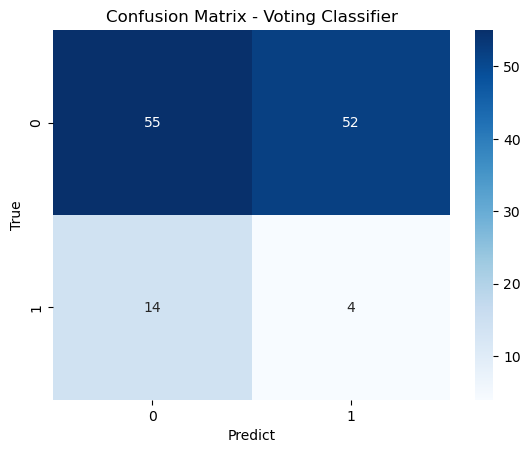

In [49]:
import seaborn as sn

#dataframe
CM_RF = confusion_matrix(y_test,RFpred)
df_RF = pd.DataFrame(CM_RF)
df_RF
ax = sn.heatmap(df_RF,annot=True,fmt='.20g',cmap='Blues')
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel('Predict') #x
ax.set_ylabel('True') #y

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

df_train_1 = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID_train_1.csv')
df_train_1 = df_train_1.drop('pt', axis=1)

# Separate features (X) and target variable (y) for training dataset
X_train_1 = df_train_1.drop('Neuropsychiatric symptoms-new', axis=1)
y_train_1 = df_train_1['Neuropsychiatric symptoms-new']

# Replace 'test_dataset.csv' with the actual name of your testing dataset
df_val = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID_val.csv')
df_val = df_val.drop('pt', axis=1)

# Separate features (X) and target variable (y) for testing dataset
X_val = df_val.drop('Neuropsychiatric symptoms-new', axis=1)
y_val = df_val['Neuropsychiatric symptoms-new']

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train_1 = scaler.fit_transform(X_train_1)
X_val = scaler.transform(X_val)

In [2]:
column_names = ['deepSleepTime (hours)', 'sleep_duration (hours)', 'REMTime (hours)','shallowSleepTime (hours)', 'Oxygen level (SpO2)']

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=11)
X_resampled, y_resampled = smote.fit_resample(X_train_1, y_train_1)

# Create a new DataFrame with the resampled data
df_resampled_1 = pd.concat([pd.DataFrame(X_resampled, columns=column_names), pd.Series(y_resampled, name='Neuropsychiatric symptoms-new')], axis=1)

# Display the count of each class after oversampling
print("Class distribution after oversampling:")
print(df_resampled_1['Neuropsychiatric symptoms-new'].value_counts())

# Save the oversampled dataset to a new CSV file
df_resampled_1.to_csv('oversampled_normalized_ML_COVID_train_1.csv', index=False)

Class distribution after oversampling:
0    372
1    372
Name: Neuropsychiatric symptoms-new, dtype: int64


In [3]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled_train_1 = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_1.csv')

# Separate features (X) and target variable (y) for training dataset
X_train_1 = df_resampled_train_1.drop('Neuropsychiatric symptoms-new', axis=1)
y_train_1 = df_resampled_train_1['Neuropsychiatric symptoms-new']

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=14)
xgb_classifier = XGBClassifier(random_state=14)
logreg_classifier = LogisticRegression(random_state=14)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models and their names
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Step 4: Combine oversampled data and perform 6-fold cross-validation for each model
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=16)

# Using F1 score as the scoring metric
f1_scores = []

for model, name in zip(models, model_names):
    f1_scorer = make_scorer(f1_score)
    cross_val_results = cross_val_score(model, X_train_1, y_train_1, cv=cv, scoring=f1_scorer)
    mean_f1_score = cross_val_results.mean()
    f1_scores.append((name, mean_f1_score))

# Sort and print F1 scores in descending order
sorted_f1_scores = sorted(f1_scores, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores:")
for name, mean_f1_score in sorted_f1_scores:
    print(f'Model: {name}, Mean Cross-Validation F1 Score: {mean_f1_score}')

# Choose the best model based on the highest F1 score
best_model_name, best_model_f1 = sorted_f1_scores[0]
print(f"\nBest Model: {best_model_name}, Mean Cross-Validation F1 Score: {best_model_f1}")

# Lists to store validation F1 scores and accuracy scores
validation_f1_scores = []
validation_accuracy_scores = []

for model, name in zip(models, model_names):
    model.fit(X_train_1, y_train_1)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    validation_f1_scores.append((name, f1))
    validation_accuracy_scores.append((name, accuracy))

# Sort and print Validation F1 scores in descending order
sorted_validation_f1_scores = sorted(validation_f1_scores, key=lambda x: x[1], reverse=True)
print("\nSorted Validation F1 Scores:")
for name, f1_score in sorted_validation_f1_scores:
    print(f'Model: {name}, Validation F1 Score: {f1_score}')

# Sort and print Validation accuracy scores in descending order
sorted_validation_accuracy_scores = sorted(validation_accuracy_scores, key=lambda x: x[1], reverse=True)
print("\nSorted Validation Accuracy Scores:")
for name, accuracy_score in sorted_validation_accuracy_scores:
    print(f'Model: {name}, Validation Accuracy Score: {accuracy_score}')

# Choose the best model based on the highest Validation F1 score
best_model_name, best_model_f1 = sorted_validation_f1_scores[0]
print(f"\nBest Model (Validation F1): {best_model_name}, Validation F1 Score: {best_model_f1}")

# Choose the best model based on the highest Validation accuracy score
best_model_name_acc, best_model_acc = sorted_validation_accuracy_scores[0]
print(f"Best Model (Validation Accuracy): {best_model_name_acc}, Validation Accuracy Score: {best_model_acc}")



Sorted F1 Scores:
Model: XGBoost, Mean Cross-Validation F1 Score: 0.9204341150456138
Model: Voting Classifier, Mean Cross-Validation F1 Score: 0.9012386381628925
Model: Random Forest, Mean Cross-Validation F1 Score: 0.8976703928115364
Model: Logistic Regression, Mean Cross-Validation F1 Score: 0.5681544649793538

Best Model: XGBoost, Mean Cross-Validation F1 Score: 0.9204341150456138


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



Sorted Validation F1 Scores:
Model: XGBoost, Validation F1 Score: 0.4782608695652174
Model: Random Forest, Validation F1 Score: 0.3902439024390244
Model: Voting Classifier, Validation F1 Score: 0.35000000000000003
Model: Logistic Regression, Validation F1 Score: 0.30303030303030304

Sorted Validation Accuracy Scores:
Model: XGBoost, Validation Accuracy Score: 0.6756756756756757
Model: Random Forest, Validation Accuracy Score: 0.6621621621621622
Model: Voting Classifier, Validation Accuracy Score: 0.6486486486486487
Model: Logistic Regression, Validation Accuracy Score: 0.3783783783783784

Best Model (Validation F1): XGBoost, Validation F1 Score: 0.4782608695652174
Best Model (Validation Accuracy): XGBoost, Validation Accuracy Score: 0.6756756756756757


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Run and output using F1 score

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled_train_1 = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_1.csv')

# Separate features (X) and target variable (y) for training dataset
X_train_1 = df_resampled_train_1.drop('Neuropsychiatric symptoms-new', axis=1)
y_train_1 = df_resampled_train_1['Neuropsychiatric symptoms-new']

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=14)
xgb_classifier = XGBClassifier(max_depth=5, random_state=14, learning_rate=0.1)
logreg_classifier = LogisticRegression(C=0.1, random_state=14)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models and their names
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Step 4: Combine oversampled data and perform 5-fold cross-validation for each model
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=16)

# Using F1 score as the scoring metric
f1_scores_cv = []

for model, name in zip(models, model_names):
    f1_scorer = make_scorer(f1_score)
    cross_val_results = cross_val_score(model, X_train_1, y_train_1, cv=cv, scoring=f1_scorer)
    mean_f1_score = cross_val_results.mean()
    f1_scores_cv.append((name, mean_f1_score))

# Sort and print F1 scores in descending order after cross-validation
sorted_f1_scores_cv = sorted(f1_scores_cv, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores after Cross-Validation:")
for name, mean_f1_score in sorted_f1_scores_cv:
    print(f'Model: {name}, Mean Cross-Validation F1 Score: {mean_f1_score}')

# Step 5: Train the model on the entire oversampled training set and test on validation set
f1_scores_val = []

for model, name in zip(models, model_names):
    model.fit(X_train_1, y_train_1)
    y_pred_val = model.predict(X_val)
    f1_val = f1_score(y_val, y_pred_val)
    f1_scores_val.append((name, f1_val))

# Sort and print F1 scores on the validation set in descending order
sorted_f1_scores_val = sorted(f1_scores_val, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores on Validation Set:")
for name, f1_val in sorted_f1_scores_val:
    print(f'Model: {name}, Validation F1 Score: {f1_val}')



Sorted F1 Scores after Cross-Validation:
Model: XGBoost, Mean Cross-Validation F1 Score: 0.9134457188789494
Model: Voting Classifier, Mean Cross-Validation F1 Score: 0.862409032789694
Model: Random Forest, Mean Cross-Validation F1 Score: 0.788632092416496
Model: Logistic Regression, Mean Cross-Validation F1 Score: 0.6046170984923185

Sorted F1 Scores on Validation Set:
Model: XGBoost, Validation F1 Score: 0.4782608695652174
Model: Voting Classifier, Validation F1 Score: 0.358974358974359
Model: Random Forest, Validation F1 Score: 0.35714285714285715
Model: Logistic Regression, Validation F1 Score: 0.25806451612903225


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Classificstion Report:')
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val,y_pred_val))

Classificstion Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        52
           1       0.39      0.32      0.35        22

    accuracy                           0.65        74
   macro avg       0.56      0.55      0.55        74
weighted avg       0.63      0.65      0.64        74

[[41 11]
 [15  7]]


### Hyperparameter Tuning

In [7]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled_train_1 = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_1.csv')

# Separate features (X) and target variable (y) for training dataset
X_train_1 = df_resampled_train_1.drop('Neuropsychiatric symptoms-new', axis=1)
y_train_1 = df_resampled_train_1['Neuropsychiatric symptoms-new']

# Define class weights (you can adjust these values based on your dataset characteristics)
class_weights = {0: 1, 1: 5}  # Assign higher weight to the minority class

from sklearn.model_selection import GridSearchCV

param_grid = {'class_weight': [{0: 1, 1: w} for w in range(1, 10)]}  # Adjust the range as needed

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_1, y_train_1)

best_class_weights = grid_search.best_params_['class_weight']

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=14, class_weight=class_weights)
xgb_classifier = XGBClassifier(random_state=14, scale_pos_weight=class_weights[1])  # XGBoost uses `scale_pos_weight` for class weights)
logreg_classifier = LogisticRegression(random_state=14, class_weight=class_weights)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='soft')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models and their names
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Step 4: Combine oversampled data and perform 5-fold cross-validation for each model
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=16)

# Using F1 score as the scoring metric
f1_scores_cv = []

for model, name in zip(models, model_names):
    f1_scorer = make_scorer(f1_score)
    cross_val_results = cross_val_score(model, X_train_1, y_train_1, cv=cv, scoring=f1_scorer)
    mean_f1_score = cross_val_results.mean()
    f1_scores_cv.append((name, mean_f1_score))

# Sort and print F1 scores in descending order after cross-validation
sorted_f1_scores_cv = sorted(f1_scores_cv, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores after Cross-Validation:")
for name, mean_f1_score in sorted_f1_scores_cv:
    print(f'Model: {name}, Mean Cross-Validation F1 Score: {mean_f1_score}')

# Step 5: Train each model on the entire oversampled training set, test on validation set, and tune class weights/threshold
f1_scores_val = []

for model, name in zip(models, model_names):
    # Train the model on the entire oversampled training set
    model.fit(X_train_1, y_train_1)
    
    # Predict probabilities on the validation set
    y_prob_val = model.predict_proba(X_val)[:, 1]
    
    # Set a custom threshold 
    custom_threshold = 0.1
    
    # Convert probabilities to binary predictions based on the custom threshold
    y_pred_val_custom = (y_prob_val > custom_threshold).astype(int)
    
    # Evaluate the model with the custom threshold
    f1_val = f1_score(y_val, y_pred_val_custom)
    
    print(f'Model: {name}, Validation F1 Score with Custom Threshold: {f1_val}')
    
    f1_scores_val.append((name, f1_val))

# Sort and print F1 scores on the validation set in descending order
sorted_f1_scores_val = sorted(f1_scores_val, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores on Validation Set:")
for name, f1_val in sorted_f1_scores_val:
    print(f'Model: {name}, Validation F1 Score: {f1_val}')



Sorted F1 Scores after Cross-Validation:
Model: XGBoost, Mean Cross-Validation F1 Score: 0.9068910773454166
Model: Voting Classifier, Mean Cross-Validation F1 Score: 0.9044034233772941
Model: Random Forest, Mean Cross-Validation F1 Score: 0.8962221805607632
Model: Logistic Regression, Mean Cross-Validation F1 Score: 0.6678743961352657
Model: Random Forest, Validation F1 Score with Custom Threshold: 0.5538461538461539
Model: XGBoost, Validation F1 Score with Custom Threshold: 0.6071428571428571
Model: Logistic Regression, Validation F1 Score with Custom Threshold: 0.4583333333333333
Model: Voting Classifier, Validation F1 Score with Custom Threshold: 0.4583333333333333

Sorted F1 Scores on Validation Set:
Model: XGBoost, Validation F1 Score: 0.6071428571428571
Model: Random Forest, Validation F1 Score: 0.5538461538461539
Model: Logistic Regression, Validation F1 Score: 0.4583333333333333
Model: Voting Classifier, Validation F1 Score: 0.4583333333333333


In [19]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled_train_1 = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_1.csv')

# Separate features (X) and target variable (y) for training dataset
X_train_1 = df_resampled_train_1.drop('Neuropsychiatric symptoms-new', axis=1)
y_train_1 = df_resampled_train_1['Neuropsychiatric symptoms-new']

# Define class weights (you can adjust these values based on your dataset characteristics)
class_weights = {0: 1, 1: 3}  # Assign higher weight to the minority class

from sklearn.model_selection import GridSearchCV

# param_grid = {'class_weight': [{0: 1, 1: w} for w in range(1, 10)]}  # Adjust the range as needed

# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
# grid_search.fit(X_train_1, y_train_1)

# best_class_weights = grid_search.best_params_['class_weight']

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=14, class_weight=class_weights)
xgb_classifier = XGBClassifier(random_state=14, scale_pos_weight=class_weights[1])  # XGBoost uses `scale_pos_weight` for class weights)
logreg_classifier = LogisticRegression(random_state=14, class_weight=class_weights)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='soft')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models and their names
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Step 4: Combine oversampled data and perform 5-fold cross-validation for each model
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=16)

# Using F1 score as the scoring metric
f1_scores_cv = []

for model, name in zip(models, model_names):
    f1_scorer = make_scorer(f1_score)
    cross_val_results = cross_val_score(model, X_train_1, y_train_1, cv=cv, scoring=f1_scorer)
    mean_f1_score = cross_val_results.mean()
    f1_scores_cv.append((name, mean_f1_score))

# Sort and print F1 scores in descending order after cross-validation
sorted_f1_scores_cv = sorted(f1_scores_cv, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores after Cross-Validation:")
for name, mean_f1_score in sorted_f1_scores_cv:
    print(f'Model: {name}, Mean Cross-Validation F1 Score: {mean_f1_score}')

# Step 5: Train each model on the entire oversampled training set, test on validation set, and tune class weights/threshold
f1_scores_val = []

for model, name in zip(models, model_names):
    # Train the model on the entire oversampled training set
    model.fit(X_train_1, y_train_1)
    
    # Predict probabilities on the validation set
    y_prob_val = model.predict_proba(X_val)[:, 1]
    
    # Set a custom threshold (you can experiment with different values)
    custom_threshold = 0.1
    
    # Convert probabilities to binary predictions based on the custom threshold
    y_pred_val_custom = (y_prob_val > custom_threshold).astype(int)
    
    # Evaluate the model with the custom threshold
    f1_val = f1_score(y_val, y_pred_val_custom)
    
    print(f'Model: {name}, Validation F1 Score with Custom Threshold: {f1_val}')
    
    f1_scores_val.append((name, f1_val))

# Sort and print F1 scores on the validation set in descending order
sorted_f1_scores_val = sorted(f1_scores_val, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores on Validation Set:")
for name, f1_val in sorted_f1_scores_val:
    print(f'Model: {name}, Validation F1 Score: {f1_val}')



Sorted F1 Scores after Cross-Validation:
Model: Voting Classifier, Mean Cross-Validation F1 Score: 0.9162603234217381
Model: XGBoost, Mean Cross-Validation F1 Score: 0.9145851049343925
Model: Random Forest, Mean Cross-Validation F1 Score: 0.899080700845194
Model: Logistic Regression, Mean Cross-Validation F1 Score: 0.6684881602914389
Model: Random Forest, Validation F1 Score with Custom Threshold: 0.5625
Model: XGBoost, Validation F1 Score with Custom Threshold: 0.6181818181818182
Model: Logistic Regression, Validation F1 Score with Custom Threshold: 0.4583333333333333
Model: Voting Classifier, Validation F1 Score with Custom Threshold: 0.4583333333333333

Sorted F1 Scores on Validation Set:
Model: XGBoost, Validation F1 Score: 0.6181818181818182
Model: Random Forest, Validation F1 Score: 0.5625
Model: Logistic Regression, Validation F1 Score: 0.4583333333333333
Model: Voting Classifier, Validation F1 Score: 0.4583333333333333


In [20]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled_train_1 = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_1.csv')

# Separate features (X) and target variable (y) for training dataset
X_train_1 = df_resampled_train_1.drop('Neuropsychiatric symptoms-new', axis=1)
y_train_1 = df_resampled_train_1['Neuropsychiatric symptoms-new']

# Define class weights (you can adjust these values based on your dataset characteristics)
class_weights = {0: 1, 1: 3}  # Assign higher weight to the minority class

# Initialize individual classifiers with default parameters
rf_classifier = RandomForestClassifier(random_state=14)
xgb_classifier = XGBClassifier(random_state=14, scale_pos_weight=class_weights[1])  # XGBoost uses `scale_pos_weight` for class weights
logreg_classifier = LogisticRegression(random_state=14, class_weight=class_weights)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='soft')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models and their names
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Parameter grids for each model
param_grids = [
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.3, 0.1, 0.01, 0.001]
    },
    {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2', 'none'],
        'solver': ['liblinear', 'lbfgs', 'saga']
    }
]

# Using F1 score as the scoring metric
f1_scorer = make_scorer(f1_score)

# Perform GridSearchCV for each model
for model, name, param_grid in zip(models, model_names, param_grids):
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=f1_scorer)
    grid_search.fit(X_train_1, y_train_1)

    # Get the best parameters and print results
    best_params = grid_search.best_params_
    best_f1_score = grid_search.best_score_

    print(f'Model: {name}')
    print(f'Best Parameters: {best_params}')
    print(f'Best F1 Score: {best_f1_score}\n')

    # Train the model with the best parameters on the entire oversampled training set
    model.set_params(**best_params)
    model.fit(X_train_1, y_train_1)

    # Predict on the validation set and evaluate
    y_pred_val = model.predict(X_val)
    f1_val = f1_score(y_val, y_pred_val)
    print(f'Validation F1 Score with Best Parameters: {f1_val}\n')


Model: Random Forest
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best F1 Score: 0.8144647272338854

Validation F1 Score with Best Parameters: 0.35000000000000003

Model: XGBoost
Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
Best F1 Score: 0.7906776801920516

Validation F1 Score with Best Parameters: 0.5306122448979591

Model: Logistic Regression
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.6672619047619047

Validation F1 Score with Best Parameters: 0.4583333333333333



In [30]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled_train_1 = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_1.csv')

# Separate features (X) and target variable (y) for training dataset
X_train_1 = df_resampled_train_1.drop('Neuropsychiatric symptoms-new', axis=1)
y_train_1 = df_resampled_train_1['Neuropsychiatric symptoms-new']

# Define class weights (you can adjust these values based on your dataset characteristics)
class_weights = {0: 1, 1: 3}  # Assign higher weight to the minority class

from sklearn.model_selection import GridSearchCV

# param_grid = {'class_weight': [{0: 1, 1: w} for w in range(1, 10)]}  # Adjust the range as needed

# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
# grid_search.fit(X_train_1, y_train_1)

# best_class_weights = grid_search.best_params_['class_weight']

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=14, class_weight=class_weights)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=14, scale_pos_weight=class_weights[1])  # XGBoost uses `scale_pos_weight` for class weights)
logreg_classifier = LogisticRegression(C=0.1, random_state=14, class_weight=class_weights)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='soft')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models and their names
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Step 4: Combine oversampled data and perform 5-fold cross-validation for each model
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=16)

# Using F1 score as the scoring metric
f1_scores_cv = []

for model, name in zip(models, model_names):
    f1_scorer = make_scorer(f1_score)
    cross_val_results = cross_val_score(model, X_train_1, y_train_1, cv=cv, scoring=f1_scorer)
    mean_f1_score = cross_val_results.mean()
    f1_scores_cv.append((name, mean_f1_score))

# Sort and print F1 scores in descending order after cross-validation
sorted_f1_scores_cv = sorted(f1_scores_cv, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores after Cross-Validation:")
for name, mean_f1_score in sorted_f1_scores_cv:
    print(f'Model: {name}, Mean Cross-Validation F1 Score: {mean_f1_score}')

# Step 5: Train each model on the entire oversampled training set, test on validation set, and tune class weights/threshold
f1_scores_val = []

for model, name in zip(models, model_names):
    # Train the model on the entire oversampled training set
    model.fit(X_train_1, y_train_1)
    
    # Predict probabilities on the validation set
    y_prob_val = model.predict_proba(X_val)[:, 1]
    
    # Set a custom threshold (you can experiment with different values)
    custom_threshold = 0.1
    
    # Convert probabilities to binary predictions based on the custom threshold
    y_pred_val_custom = (y_prob_val > custom_threshold).astype(int)
    
    # Evaluate the model with the custom threshold
    f1_val = f1_score(y_val, y_pred_val_custom)
    
    print(f'Model: {name}, Validation F1 Score with Custom Threshold: {f1_val}')
    
    f1_scores_val.append((name, f1_val))

# Sort and print F1 scores on the validation set in descending order
sorted_f1_scores_val = sorted(f1_scores_val, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores on Validation Set:")
for name, f1_val in sorted_f1_scores_val:
    print(f'Model: {name}, Validation F1 Score: {f1_val}')



Sorted F1 Scores after Cross-Validation:
Model: XGBoost, Mean Cross-Validation F1 Score: 0.9145851049343925
Model: Voting Classifier, Mean Cross-Validation F1 Score: 0.911664250514649
Model: Random Forest, Mean Cross-Validation F1 Score: 0.899080700845194
Model: Logistic Regression, Mean Cross-Validation F1 Score: 0.6666666666666666
Model: Random Forest, Validation F1 Score with Custom Threshold: 0.5625
Model: XGBoost, Validation F1 Score with Custom Threshold: 0.6181818181818182
Model: Logistic Regression, Validation F1 Score with Custom Threshold: 0.4583333333333333
Model: Voting Classifier, Validation F1 Score with Custom Threshold: 0.4583333333333333

Sorted F1 Scores on Validation Set:
Model: XGBoost, Validation F1 Score: 0.6181818181818182
Model: Random Forest, Validation F1 Score: 0.5625
Model: Logistic Regression, Validation F1 Score: 0.4583333333333333
Model: Voting Classifier, Validation F1 Score: 0.4583333333333333


In [23]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled_train_1 = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_1.csv')

# Separate features (X) and target variable (y) for the training dataset
X_train_1 = df_resampled_train_1.drop('Neuropsychiatric symptoms-new', axis=1)
y_train_1 = df_resampled_train_1['Neuropsychiatric symptoms-new']

# Define class weights (you can adjust these values based on your dataset characteristics)
class_weights = {0: 1, 1: 3}  # Assign higher weight to the minority class

# Initialize individual classifiers with default parameters
rf_classifier = RandomForestClassifier(random_state=14)
xgb_classifier = XGBClassifier(random_state=14, scale_pos_weight=class_weights[1])
logreg_classifier = LogisticRegression(random_state=14, class_weight=class_weights)

# List of models and their names
models = [rf_classifier, xgb_classifier, logreg_classifier]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression']

# Parameter grids for each model
param_grids = [
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.3, 0.1, 0.01, 0.001]
    },
    {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2', 'none'],
        'solver': ['liblinear', 'lbfgs', 'saga']
    }
]

# Using F1 score as the scoring metric
f1_scorer = make_scorer(f1_score)

# Store the best models and their parameters
best_models = []

# Perform GridSearchCV for each model
for model, name, param_grid in zip(models, model_names, param_grids):
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=f1_scorer)
    grid_search.fit(X_train_1, y_train_1)

    # Get the best parameters and print results
    best_params = grid_search.best_params_
    best_f1_score = grid_search.best_score_

    print(f'Model: {name}')
    print(f'Best Parameters: {best_params}')
    print(f'Best F1 Score: {best_f1_score}\n')

    # Train the model with the best parameters on the entire oversampled training set
    best_model = model.__class__(**best_params)
    best_model.fit(X_train_1, y_train_1)
    
    # Append the best model to the list
    best_models.append((name, best_model))

# Create a Voting Classifier with the best models
voting_classifier_best = VotingClassifier(estimators=best_models, voting='soft')  

# Train the ensemble model on the entire oversampled training set
voting_classifier_best.fit(X_train_1, y_train_1)

# Predict on the validation set and evaluate
y_pred_val_best = voting_classifier_best.predict(X_val)
f1_val_best = f1_score(y_val, y_pred_val_best)
print(f'Validation F1 Score with Best Parameters: {f1_val_best}\n')


Model: Random Forest
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best F1 Score: 0.8144647272338854

Model: XGBoost
Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
Best F1 Score: 0.7906776801920516

Model: Logistic Regression
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.6672619047619047

Validation F1 Score with Best Parameters: 0.4186046511627907



In [61]:
import pandas as pd

df_train = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ori/ML_COVID_train.csv')

# Load your pre-split testing dataset into a pandas DataFrame
# Replace 'test_dataset.csv' with the actual name of your testing dataset
df_test = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ori/ML_COVID_test.csv')

df_train = df_train.drop('pt', axis=1)
df_test = df_test.drop('pt', axis=1)

# Separate features (X) and target variable (y) for training dataset
X_train = df_train.drop('Neuropsychiatric symptoms-new', axis=1)
y_train = df_train['Neuropsychiatric symptoms-new']

# Separate features (X) and target variable (y) for testing dataset
X_test = df_test.drop('Neuropsychiatric symptoms-new', axis=1)
y_test = df_test['Neuropsychiatric symptoms-new']

column_names = ['deepSleepTime (hours)', 'sleep_duration (hours)', 'REMTime (hours)','shallowSleepTime (hours)', 'Oxygen level (SpO2)']

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
column_names = ['deepSleepTime (hours)', 'sleep_duration (hours)', 'REMTime (hours)','shallowSleepTime (hours)', 'Oxygen level (SpO2)']

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=74)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=column_names), pd.Series(y_resampled, name='Neuropsychiatric symptoms-new')], axis=1)

# Display the count of each class after oversampling
print("Class distribution after oversampling:")
print(df_resampled['Neuropsychiatric symptoms-new'].value_counts())

# Save the oversampled dataset to a new CSV file
df_resampled.to_csv('oversampled_normalized_ML_COVID_train_2.csv', index=False)

Class distribution after oversampling:
0    424
1    424
Name: Neuropsychiatric symptoms-new, dtype: int64


In [63]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled_train = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_2.csv')

# Separate features (X) and target variable (y) for training dataset
X_train = df_resampled_train.drop('Neuropsychiatric symptoms-new', axis=1)
y_train = df_resampled_train['Neuropsychiatric symptoms-new']

# Define class weights (you can adjust these values based on your dataset characteristics)
class_weights = {0: 1, 1: 2}  # Assign higher weight to the minority class

from sklearn.model_selection import GridSearchCV

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=75, class_weight=class_weights)
xgb_classifier = XGBClassifier(random_state=75, scale_pos_weight=class_weights[1])  # XGBoost uses `scale_pos_weight` for class weights)
logreg_classifier = LogisticRegression(random_state=75, class_weight=class_weights)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='soft')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models and their names
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Step 4: Combine oversampled data and perform 5-fold cross-validation for each model
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=76)

# Using F1 score as the scoring metric
f1_scores_cv = []

for model, name in zip(models, model_names):
    f1_scorer = make_scorer(f1_score)
    cross_val_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=f1_scorer)
    mean_f1_score = cross_val_results.mean()
    f1_scores_cv.append((name, mean_f1_score))

# Sort and print F1 scores in descending order after cross-validation
sorted_f1_scores_cv = sorted(f1_scores_cv, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores after Cross-Validation:")
for name, mean_f1_score in sorted_f1_scores_cv:
    print(f'Model: {name}, Mean Cross-Validation F1 Score: {mean_f1_score}')

# Step 5: Train each model on the entire oversampled training set, test on validation set, and tune class weights/threshold
f1_scores_test = []

for model, name in zip(models, model_names):
    # Train the model on the entire oversampled training set
    model.fit(X_train, y_train)
    
    # Predict probabilities on the validation set
    y_prob_test = model.predict_proba(X_test)[:, 1]
    
    # Set a custom threshold (you can experiment with different values)
    custom_threshold = 0.5
    
    # Convert probabilities to binary predictions based on the custom threshold
    y_pred_test_custom = (y_prob_test > custom_threshold).astype(int)
    
    # Evaluate the model with the custom threshold
    f1_test = f1_score(y_test, y_pred_test_custom)
    
    print(f'Model: {name}, Test F1 Score with Custom Threshold: {f1_test}')
    
    f1_scores_test.append((name, f1_test))

# Sort and print F1 scores on the validation set in descending order
sorted_f1_scores_test = sorted(f1_scores_test, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores on Test Set:")
for name, f1_test in sorted_f1_scores_test:
    print(f'Model: {name}, Test F1 Score: {f1_test}')



Sorted F1 Scores after Cross-Validation:
Model: XGBoost, Mean Cross-Validation F1 Score: 0.902347796374586
Model: Voting Classifier, Mean Cross-Validation F1 Score: 0.899424110724588
Model: Random Forest, Mean Cross-Validation F1 Score: 0.8865570702797251
Model: Logistic Regression, Mean Cross-Validation F1 Score: 0.6677223364829552
Model: Random Forest, Test F1 Score with Custom Threshold: 0.15384615384615385
Model: XGBoost, Test F1 Score with Custom Threshold: 0.1473684210526316
Model: Logistic Regression, Test F1 Score with Custom Threshold: 0.2517482517482518
Model: Voting Classifier, Test F1 Score with Custom Threshold: 0.14285714285714285

Sorted F1 Scores on Test Set:
Model: Logistic Regression, Test F1 Score: 0.2517482517482518
Model: Random Forest, Test F1 Score: 0.15384615384615385
Model: XGBoost, Test F1 Score: 0.1473684210526316
Model: Voting Classifier, Test F1 Score: 0.14285714285714285


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define class weights (you can adjust these values based on your dataset characteristics)
class_weights = {0: 1, 1: 2}  # Assign higher weight to the minority class

XGBmodel = XGBClassifier(random_state=75, scale_pos_weight=class_weights[1])
# LRmodel = LogisticRegression(random_state=75, class_weight=class_weights)
# VCmodel = VotingClassifier(estimators=[
#     ('random_forest', rf_classifier),
#     ('xgboost', xgb_classifier),
#     ('logistic_regression', logreg_classifier)
# ], voting='soft')

XGBmodel.fit(X_train,y_train)
# y_prob_test = XGBmodel.predict_proba(X_test)[:, 1]
# custom_threshold = 0.5
y_pred = XGBmodel.predict(X_test)
# y_pred_test_custom = (y_prob_test > custom_threshold).astype(int)

f1_test = f1_score(y_test, y_pred)
# f1_test = f1_score(y_test, y_pred_test_custom)
accuracy_test = accuracy_score(y_test, y_pred)
print('f1 score on test set: {:.4f}'.format(f1_test))
print('accuracy score on test set: {:.4f}'.format(accuracy_test))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

f1 score on test set: 0.1474
accuracy score on test set: 0.3520
              precision    recall  f1-score   support

           0       0.77      0.35      0.48       107
           1       0.09      0.39      0.15        18

    accuracy                           0.35       125
   macro avg       0.43      0.37      0.31       125
weighted avg       0.67      0.35      0.43       125

[[37 70]
 [11  7]]


Text(50.722222222222214, 0.5, 'True')

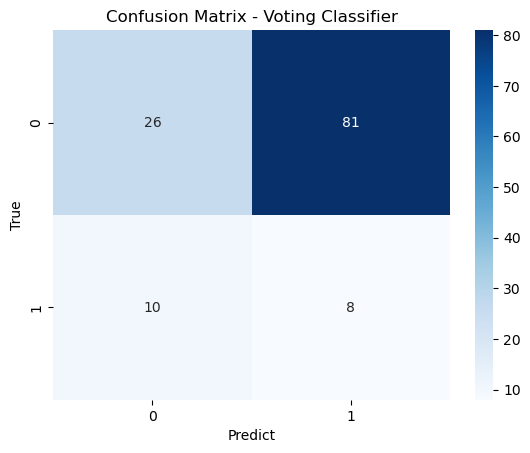

In [56]:
import seaborn as sn

#dataframe
CM_VC = confusion_matrix(y_test, y_pred_test_custom)
df_VC = pd.DataFrame(CM_VC)
df_VC
ax = sn.heatmap(df_VC,annot=True,fmt='.20g',cmap='Blues')
ax.set_title('Confusion Matrix - Voting Classifier')
ax.set_xlabel('Predict') #x
ax.set_ylabel('True') #y

In [52]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

df_train_1 = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/test/ML_COVID_train_cleaned_validate.csv')
df_train_1 = df_train_1.drop('pt', axis=1)

# Separate features (X) and target variable (y) for training dataset
X_train_1 = df_train_1.drop('Neuropsychiatric symptoms-new', axis=1)
y_train_1 = df_train_1['Neuropsychiatric symptoms-new']

# Replace 'test_dataset.csv' with the actual name of your testing dataset
df_val = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/test/ML_COVID_val.csv')
df_val = df_val.drop('pt', axis=1)

# Separate features (X) and target variable (y) for testing dataset
X_val = df_val.drop('Neuropsychiatric symptoms-new', axis=1)
y_val = df_val['Neuropsychiatric symptoms-new']

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train_1 = scaler.fit_transform(X_train_1)
X_val = scaler.transform(X_val)

In [53]:
column_names = ['deepSleepTime (hours)', 'sleep_duration (hours)', 'REMTime (hours)','shallowSleepTime (hours)', 'Oxygen level (SpO2)']

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=11)
X_resampled, y_resampled = smote.fit_resample(X_train_1, y_train_1)

# Create a new DataFrame with the resampled data
df_resampled_1 = pd.concat([pd.DataFrame(X_resampled, columns=column_names), pd.Series(y_resampled, name='Neuropsychiatric symptoms-new')], axis=1)

# Display the count of each class after oversampling
print("Class distribution after oversampling:")
print(df_resampled_1['Neuropsychiatric symptoms-new'].value_counts())

# Save the oversampled dataset to a new CSV file
df_resampled_1.to_csv('oversampled_normalized_ML_COVID_train_cleaned_testing.csv', index=False)

Class distribution after oversampling:
0    320
1    320
Name: Neuropsychiatric symptoms-new, dtype: int64


In [54]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled_train_1 = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_cleaned_testing.csv')

# Separate features (X) and target variable (y) for training dataset
X_train_1 = df_resampled_train_1.drop('Neuropsychiatric symptoms-new', axis=1)
y_train_1 = df_resampled_train_1['Neuropsychiatric symptoms-new']

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=14)
xgb_classifier = XGBClassifier(random_state=14)
logreg_classifier = LogisticRegression(random_state=14)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models and their names
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Step 4: Combine oversampled data and perform 6-fold cross-validation for each model
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=16)

# Using F1 score as the scoring metric
f1_scores = []

for model, name in zip(models, model_names):
    f1_scorer = make_scorer(f1_score)
    cross_val_results = cross_val_score(model, X_train_1, y_train_1, cv=cv, scoring=f1_scorer)
    mean_f1_score = cross_val_results.mean()
    f1_scores.append((name, mean_f1_score))

# Sort and print F1 scores in descending order
sorted_f1_scores = sorted(f1_scores, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores:")
for name, mean_f1_score in sorted_f1_scores:
    print(f'Model: {name}, Mean Cross-Validation F1 Score: {mean_f1_score}')

# Choose the best model based on the highest F1 score
best_model_name, best_model_f1 = sorted_f1_scores[0]
print(f"\nBest Model: {best_model_name}, Mean Cross-Validation F1 Score: {best_model_f1}")

# Lists to store validation F1 scores and accuracy scores
validation_f1_scores = []
validation_accuracy_scores = []

for model, name in zip(models, model_names):
    model.fit(X_train_1, y_train_1)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    validation_f1_scores.append((name, f1))
    validation_accuracy_scores.append((name, accuracy))

# Sort and print Validation F1 scores in descending order
sorted_validation_f1_scores = sorted(validation_f1_scores, key=lambda x: x[1], reverse=True)
print("\nSorted Validation F1 Scores:")
for name, f1_score in sorted_validation_f1_scores:
    print(f'Model: {name}, Validation F1 Score: {f1_score}')

# Sort and print Validation accuracy scores in descending order
sorted_validation_accuracy_scores = sorted(validation_accuracy_scores, key=lambda x: x[1], reverse=True)
print("\nSorted Validation Accuracy Scores:")
for name, accuracy_score in sorted_validation_accuracy_scores:
    print(f'Model: {name}, Validation Accuracy Score: {accuracy_score}')

# Choose the best model based on the highest Validation F1 score
best_model_name, best_model_f1 = sorted_validation_f1_scores[0]
print(f"\nBest Model (Validation F1): {best_model_name}, Validation F1 Score: {best_model_f1}")

# Choose the best model based on the highest Validation accuracy score
best_model_name_acc, best_model_acc = sorted_validation_accuracy_scores[0]
print(f"Best Model (Validation Accuracy): {best_model_name_acc}, Validation Accuracy Score: {best_model_acc}")



Sorted F1 Scores:
Model: XGBoost, Mean Cross-Validation F1 Score: 0.9115001976978027
Model: Voting Classifier, Mean Cross-Validation F1 Score: 0.9051603440338178
Model: Random Forest, Mean Cross-Validation F1 Score: 0.9041805586220182
Model: Logistic Regression, Mean Cross-Validation F1 Score: 0.6209562708085357

Best Model: XGBoost, Mean Cross-Validation F1 Score: 0.9115001976978027

Sorted Validation F1 Scores:
Model: Logistic Regression, Validation F1 Score: 0.23529411764705882
Model: Voting Classifier, Validation F1 Score: 0.18867924528301885
Model: Random Forest, Validation F1 Score: 0.18181818181818182
Model: XGBoost, Validation F1 Score: 0.13333333333333333

Sorted Validation Accuracy Scores:
Model: Logistic Regression, Validation Accuracy Score: 0.792
Model: Voting Classifier, Validation Accuracy Score: 0.656
Model: Random Forest, Validation Accuracy Score: 0.64
Model: XGBoost, Validation Accuracy Score: 0.376

Best Model (Validation F1): Logistic Regression, Validation F1 Sco

In [55]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled_train_1 = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_cleaned_testing.csv')

# Separate features (X) and target variable (y) for training dataset
X_train_1 = df_resampled_train_1.drop('Neuropsychiatric symptoms-new', axis=1)
y_train_1 = df_resampled_train_1['Neuropsychiatric symptoms-new']

# Define class weights (you can adjust these values based on your dataset characteristics)
# class_weights = {0: 1, 1: 3}  # Assign higher weight to the minority class

# Initialize individual classifiers with default parameters
rf_classifier = RandomForestClassifier(random_state=14)
xgb_classifier = XGBClassifier(random_state=14)  # XGBoost uses `scale_pos_weight` for class weights
logreg_classifier = LogisticRegression(random_state=14)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='soft')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models and their names
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Parameter grids for each model
param_grids = [
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.3, 0.1, 0.01, 0.001]
    },
    {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2', 'none'],
        'solver': ['liblinear', 'lbfgs', 'saga']
    }
]

# Using F1 score as the scoring metric
f1_scorer = make_scorer(f1_score)

# Perform GridSearchCV for each model
for model, name, param_grid in zip(models, model_names, param_grids):
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=f1_scorer)
    grid_search.fit(X_train_1, y_train_1)

    # Get the best parameters and print results
    best_params = grid_search.best_params_
    best_f1_score = grid_search.best_score_

    print(f'Model: {name}')
    print(f'Best Parameters: {best_params}')
    print(f'Best F1 Score: {best_f1_score}\n')

    # Train the model with the best parameters on the entire oversampled training set
    model.set_params(**best_params)
    model.fit(X_train_1, y_train_1)

    # Predict on the validation set and evaluate
    y_pred_val = model.predict(X_val)
    f1_val = f1_score(y_val, y_pred_val)
    print(f'Validation F1 Score with Best Parameters: {f1_val}\n')


Model: Random Forest
Best Parameters: {'max_depth': None, 'n_estimators': 50}
Best F1 Score: 0.850545880329723

Validation F1 Score with Best Parameters: 0.1724137931034483

Model: XGBoost
Best Parameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}
Best F1 Score: 0.8212535438891383

Validation F1 Score with Best Parameters: 0.13186813186813187

Model: Logistic Regression
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.6350262568232642

Validation F1 Score with Best Parameters: 0.21276595744680854



In [56]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled_train_1 = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_cleaned_testing.csv')

# Separate features (X) and target variable (y) for training dataset
X_train_1 = df_resampled_train_1.drop('Neuropsychiatric symptoms-new', axis=1)
y_train_1 = df_resampled_train_1['Neuropsychiatric symptoms-new']

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=14)
xgb_classifier = XGBClassifier(max_depth=5, random_state=14)
logreg_classifier = LogisticRegression(random_state=14)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models and their names
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Step 4: Combine oversampled data and perform 5-fold cross-validation for each model
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=16)

# Using F1 score as the scoring metric
f1_scores_cv = []

for model, name in zip(models, model_names):
    f1_scorer = make_scorer(f1_score)
    cross_val_results = cross_val_score(model, X_train_1, y_train_1, cv=cv, scoring=f1_scorer)
    mean_f1_score = cross_val_results.mean()
    f1_scores_cv.append((name, mean_f1_score))

# Sort and print F1 scores in descending order after cross-validation
sorted_f1_scores_cv = sorted(f1_scores_cv, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores after Cross-Validation:")
for name, mean_f1_score in sorted_f1_scores_cv:
    print(f'Model: {name}, Mean Cross-Validation F1 Score: {mean_f1_score}')

# Step 5: Train the model on the entire oversampled training set and test on validation set
f1_scores_val = []

for model, name in zip(models, model_names):
    model.fit(X_train_1, y_train_1)
    y_pred_val = model.predict(X_val)
    f1_val = f1_score(y_val, y_pred_val)
    f1_scores_val.append((name, f1_val))

# Sort and print F1 scores on the validation set in descending order
sorted_f1_scores_val = sorted(f1_scores_val, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores on Validation Set:")
for name, f1_val in sorted_f1_scores_val:
    print(f'Model: {name}, Validation F1 Score: {f1_val}')



Sorted F1 Scores after Cross-Validation:
Model: XGBoost, Mean Cross-Validation F1 Score: 0.9154617684339706
Model: Voting Classifier, Mean Cross-Validation F1 Score: 0.9049852266839826
Model: Random Forest, Mean Cross-Validation F1 Score: 0.9041805586220182
Model: Logistic Regression, Mean Cross-Validation F1 Score: 0.6209562708085357

Sorted F1 Scores on Validation Set:
Model: Logistic Regression, Validation F1 Score: 0.23529411764705882
Model: Voting Classifier, Validation F1 Score: 0.1851851851851852
Model: Random Forest, Validation F1 Score: 0.18181818181818182
Model: XGBoost, Validation F1 Score: 0.13186813186813187


In [57]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled_train_1 = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_cleaned_testing.csv')

# Separate features (X) and target variable (y) for training dataset
X_train_1 = df_resampled_train_1.drop('Neuropsychiatric symptoms-new', axis=1)
y_train_1 = df_resampled_train_1['Neuropsychiatric symptoms-new']

# Define class weights (you can adjust these values based on your dataset characteristics)
class_weights = {0: 1, 1: 3}  # Assign higher weight to the minority class

from sklearn.model_selection import GridSearchCV

# param_grid = {'class_weight': [{0: 1, 1: w} for w in range(1, 10)]}  # Adjust the range as needed

# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
# grid_search.fit(X_train_1, y_train_1)

# best_class_weights = grid_search.best_params_['class_weight']

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=14, class_weight=class_weights)
xgb_classifier = XGBClassifier(random_state=14, scale_pos_weight=class_weights[1])  # XGBoost uses `scale_pos_weight` for class weights)
logreg_classifier = LogisticRegression(random_state=14, class_weight=class_weights)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='soft')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models and their names
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Step 4: Combine oversampled data and perform 5-fold cross-validation for each model
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=16)

# Using F1 score as the scoring metric
f1_scores_cv = []

for model, name in zip(models, model_names):
    f1_scorer = make_scorer(f1_score)
    cross_val_results = cross_val_score(model, X_train_1, y_train_1, cv=cv, scoring=f1_scorer)
    mean_f1_score = cross_val_results.mean()
    f1_scores_cv.append((name, mean_f1_score))

# Sort and print F1 scores in descending order after cross-validation
sorted_f1_scores_cv = sorted(f1_scores_cv, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores after Cross-Validation:")
for name, mean_f1_score in sorted_f1_scores_cv:
    print(f'Model: {name}, Mean Cross-Validation F1 Score: {mean_f1_score}')

# Step 5: Train each model on the entire oversampled training set, test on validation set, and tune class weights/threshold
f1_scores_val = []

for model, name in zip(models, model_names):
    # Train the model on the entire oversampled training set
    model.fit(X_train_1, y_train_1)
    
    # Predict probabilities on the validation set
    y_prob_val = model.predict_proba(X_val)[:, 1]
    
    # Set a custom threshold (you can experiment with different values)
    custom_threshold = 0.5
    
    # Convert probabilities to binary predictions based on the custom threshold
    y_pred_val_custom = (y_prob_val > custom_threshold).astype(int)
    
    # Evaluate the model with the custom threshold
    f1_val = f1_score(y_val, y_pred_val_custom)
    
    print(f'Model: {name}, Validation F1 Score with Custom Threshold: {f1_val}')
    
    f1_scores_val.append((name, f1_val))

# Sort and print F1 scores on the validation set in descending order
sorted_f1_scores_val = sorted(f1_scores_val, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores on Validation Set:")
for name, f1_val in sorted_f1_scores_val:
    print(f'Model: {name}, Validation F1 Score: {f1_val}')



Sorted F1 Scores after Cross-Validation:
Model: XGBoost, Mean Cross-Validation F1 Score: 0.9144077662524593
Model: Voting Classifier, Mean Cross-Validation F1 Score: 0.9125715007217066
Model: Random Forest, Mean Cross-Validation F1 Score: 0.8990998759352632
Model: Logistic Regression, Mean Cross-Validation F1 Score: 0.6630789812287149
Model: Random Forest, Validation F1 Score with Custom Threshold: 0.16
Model: XGBoost, Validation F1 Score with Custom Threshold: 0.11764705882352941
Model: Logistic Regression, Validation F1 Score with Custom Threshold: 0.2517482517482518
Model: Voting Classifier, Validation F1 Score with Custom Threshold: 0.1411764705882353

Sorted F1 Scores on Validation Set:
Model: Logistic Regression, Validation F1 Score: 0.2517482517482518
Model: Random Forest, Validation F1 Score: 0.16
Model: Voting Classifier, Validation F1 Score: 0.1411764705882353
Model: XGBoost, Validation F1 Score: 0.11764705882352941


In [59]:
import pandas as pd

df_train = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/test/ML_COVID_train_cleaned.csv')

# Load your pre-split testing dataset into a pandas DataFrame
# Replace 'test_dataset.csv' with the actual name of your testing dataset
df_test = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/test/ML_COVID_test.csv')

df_train = df_train.drop('pt', axis=1)
df_test = df_test.drop('pt', axis=1)

# Separate features (X) and target variable (y) for training dataset
X_train = df_train.drop('Neuropsychiatric symptoms-new', axis=1)
y_train = df_train['Neuropsychiatric symptoms-new']

# Separate features (X) and target variable (y) for testing dataset
X_test = df_test.drop('Neuropsychiatric symptoms-new', axis=1)
y_test = df_test['Neuropsychiatric symptoms-new']

column_names = ['deepSleepTime (hours)', 'sleep_duration (hours)', 'REMTime (hours)','shallowSleepTime (hours)', 'Oxygen level (SpO2)']

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
column_names = ['deepSleepTime (hours)', 'sleep_duration (hours)', 'REMTime (hours)','shallowSleepTime (hours)', 'Oxygen level (SpO2)']

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=74)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=column_names), pd.Series(y_resampled, name='Neuropsychiatric symptoms-new')], axis=1)

# Display the count of each class after oversampling
print("Class distribution after oversampling:")
print(df_resampled['Neuropsychiatric symptoms-new'].value_counts())

# Save the oversampled dataset to a new CSV file
df_resampled.to_csv('oversampled_normalized_ML_COVID_train_cleaned_2_test.csv', index=False)

Class distribution after oversampling:
0    427
1    427
Name: Neuropsychiatric symptoms-new, dtype: int64


In [66]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your data from a CSV file
df_resampled_train = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train_cleaned_2_test.csv')

# Separate features (X) and target variable (y) for training dataset
X_train = df_resampled_train.drop('Neuropsychiatric symptoms-new', axis=1)
y_train = df_resampled_train['Neuropsychiatric symptoms-new']

# Define class weights (you can adjust these values based on your dataset characteristics)
class_weights = {0: 1, 1: 5}  # Assign higher weight to the minority class

from sklearn.model_selection import GridSearchCV

# param_grid = {'class_weight': [{0: 1, 1: w} for w in range(1, 10)]}  # Adjust the range as needed

# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
# grid_search.fit(X_train_1, y_train_1)

# best_class_weights = grid_search.best_params_['class_weight']

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=14, class_weight=class_weights)
xgb_classifier = XGBClassifier(random_state=14, scale_pos_weight=class_weights[1])  # XGBoost uses `scale_pos_weight` for class weights)
logreg_classifier = LogisticRegression(random_state=14, class_weight=class_weights)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='soft')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models and their names
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier']

# Step 4: Combine oversampled data and perform 5-fold cross-validation for each model
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=16)

# Using F1 score as the scoring metric
f1_scores_cv = []

for model, name in zip(models, model_names):
    f1_scorer = make_scorer(f1_score)
    cross_val_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=f1_scorer)
    mean_f1_score = cross_val_results.mean()
    f1_scores_cv.append((name, mean_f1_score))

# Sort and print F1 scores in descending order after cross-validation
sorted_f1_scores_cv = sorted(f1_scores_cv, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores after Cross-Validation:")
for name, mean_f1_score in sorted_f1_scores_cv:
    print(f'Model: {name}, Mean Cross-Validation F1 Score: {mean_f1_score}')

# Step 5: Train each model on the entire oversampled training set, test on validation set, and tune class weights/threshold
f1_scores_test = []

for model, name in zip(models, model_names):
    # Train the model on the entire oversampled training set
    model.fit(X_train, y_train)
    
    # Predict probabilities on the validation set
    y_prob_test = model.predict_proba(X_test)[:, 1]
    
    # Set a custom threshold (you can experiment with different values)
    custom_threshold = 0.3
    
    # Convert probabilities to binary predictions based on the custom threshold
    y_pred_test_custom = (y_prob_test > custom_threshold).astype(int)
    
    # Evaluate the model with the custom threshold
    f1_test = f1_score(y_test, y_pred_test_custom)
    
    print(f'Model: {name}, Test F1 Score with Custom Threshold: {f1_test}')
    
    f1_scores_test.append((name, f1_test))

# Sort and print F1 scores on the validation set in descending order
sorted_f1_scores_test = sorted(f1_scores_test, key=lambda x: x[1], reverse=True)
print("\nSorted F1 Scores on Test Set:")
for name, f1_test in sorted_f1_scores_test:
    print(f'Model: {name}, Test F1 Score: {f1_test}')



Sorted F1 Scores after Cross-Validation:
Model: XGBoost, Mean Cross-Validation F1 Score: 0.9149559820607872
Model: Voting Classifier, Mean Cross-Validation F1 Score: 0.9023442872293671
Model: Random Forest, Mean Cross-Validation F1 Score: 0.8962234735069329
Model: Logistic Regression, Mean Cross-Validation F1 Score: 0.6677075715469748
Model: Random Forest, Test F1 Score with Custom Threshold: 0.35616438356164387
Model: XGBoost, Test F1 Score with Custom Threshold: 0.3287671232876712
Model: Logistic Regression, Test F1 Score with Custom Threshold: 0.4583333333333333
Model: Voting Classifier, Test F1 Score with Custom Threshold: 0.4318181818181818

Sorted F1 Scores on Test Set:
Model: Logistic Regression, Test F1 Score: 0.4583333333333333
Model: Voting Classifier, Test F1 Score: 0.4318181818181818
Model: Random Forest, Test F1 Score: 0.35616438356164387
Model: XGBoost, Test F1 Score: 0.3287671232876712


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define class weights (you can adjust these values based on your dataset characteristics)
class_weights = {0: 1, 1: 5}  # Assign higher weight to the minority class

# XGBmodel = XGBClassifier(random_state=75, scale_pos_weight=class_weights[1])
# LRmodel = LogisticRegression(random_state=75, class_weight=class_weights)
# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=14, class_weight=class_weights)
xgb_classifier = XGBClassifier(random_state=14, scale_pos_weight=class_weights[1])  # XGBoost uses `scale_pos_weight` for class weights)
logreg_classifier = LogisticRegression(random_state=14, class_weight=class_weights)
VCmodel = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='soft')

VCmodel.fit(X_train,y_train)
y_prob_test = VCmodel.predict_proba(X_test)[:, 1]
custom_threshold = 0.3
# y_pred = VCmodel.predict(X_test)
y_pred_test_custom = (y_prob_test > custom_threshold).astype(int)

# f1_test = f1_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred_test_custom)
accuracy_test = accuracy_score(y_test, y_pred_test_custom)
print('f1 score on test set: {:.4f}'.format(f1_test))
print('accuracy score on test set: {:.4f}'.format(accuracy_test))

print(classification_report(y_test, y_pred_test_custom))
print(confusion_matrix(y_test, y_pred_test_custom))

f1 score on test set: 0.4318
accuracy score on test set: 0.3243
              precision    recall  f1-score   support

           0       0.62      0.10      0.17        52
           1       0.29      0.86      0.43        22

    accuracy                           0.32        74
   macro avg       0.46      0.48      0.30        74
weighted avg       0.52      0.32      0.25        74

[[ 5 47]
 [ 3 19]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define class weights (you can adjust these values based on your dataset characteristics)
class_weights = {0: 1, 1: 2}  # Assign higher weight to the minority class

XGBmodel = XGBClassifier(random_state=75, scale_pos_weight=class_weights[1])
# LRmodel = LogisticRegression(random_state=75, class_weight=class_weights)
# VCmodel = VotingClassifier(estimators=[
#     ('random_forest', rf_classifier),
#     ('xgboost', xgb_classifier),
#     ('logistic_regression', logreg_classifier)
# ], voting='soft')

XGBmodel.fit(X_train,y_train)
# y_prob_test = XGBmodel.predict_proba(X_test)[:, 1]
# custom_threshold = 0.5
y_pred = XGBmodel.predict(X_test)
# y_pred_test_custom = (y_prob_test > custom_threshold).astype(int)

f1_test = f1_score(y_test, y_pred)
# f1_test = f1_score(y_test, y_pred_test_custom)
accuracy_test = accuracy_score(y_test, y_pred)
print('f1 score on test set: {:.4f}'.format(f1_test))
print('accuracy score on test set: {:.4f}'.format(accuracy_test))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))